In [2]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import geopandas as gpd
from shapely.geometry import Point
import shapely
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_excel('/Users/VarshiniSelvadurai/Documents/Internship/Crime_Edited.xlsx', sheet_name = '2017')
#data = pd.read_excel('C:\\Users\\vns8\\Documents\\Crime_Edited.xlsx', sheet_name = '2017')
data = data.loc[data["Crime Name1"] != "Not a Crime"]
data = data.drop(columns = ["Police District Number","Address Number","Victims","CR Number","NIBRS Code","Beat","PRA","State","Incident ID","Offence Code","Sector"])
ugh = list(map(str, data["Start Time"]))
for i in range (0, len(ugh)):
    ugh[i] = ugh[i][:2]
data["Start Time"] = ugh
ugh = (list(map(str,data['Start Date'])))
ughh = []
for i in range(0,len(ugh)):
    ugh[i] = ugh[i][5:]
    ugh[i] = ugh[i][:5]
data['Start Date'] = ugh

In [4]:
zip20910 = data.loc[data["Zip Code"] == 20910.0]
zip20902 = data.loc[data["Zip Code"] == 20902.0]
zip20906 = data.loc[data["Zip Code"] == 20906.0]
zip20874 = data.loc[data["Zip Code"] == 20874.0]
zip20904 = data.loc[data["Zip Code"] == 20904.0]
#zip20910.append({'Start Date':'10-24', 'Start Day':'Tuesday',"Zip Code":20910.0}, ignore_index=True)
#zip20902.append({'Start Date':'10-24', 'Start Day':'Tuesday',"Zip Code":20902.0}, ignore_index=True)
#zip20874.append({'Start Date':'10-24', 'Start Day':'Tuesday',"Zip Code":20874.0}, ignore_index=True)
#zip20906.append({'Start Date':'10-24', 'Start Day':'Tuesday',"Zip Code":20906.0}, ignore_index=True)
#zip20904.append({'Start Date':'10-24', 'Start Day':'Tuesday',"Zip Code":20904.0}, ignore_index=True)

In [5]:
def DUDE(array_key,array_value ):
    ugh = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    for i in range(0,len(array_key)-1):
        ugh[int(array_key[i])] = array_value[i]
    return ugh

In [6]:
def weekandcount(data,w,title):
    bruh = [[0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0]]
    for index, row in data.iterrows():
        if (row['Start Day'] == "Monday"):
            i = 6
        elif (row['Start Day'] == "Tuesday"):
            i = 5
        elif (row['Start Day'] == "Wednesday"):
            i = 4
        elif (row['Start Day'] == "Thursday"):
            i = 3
        elif (row['Start Day'] == "Friday"):
            i = 2
        elif (row['Start Day'] == "Saturday"):
            i = 1
        elif (row['Start Day'] == "Sunday"):
            i = 0
        if (row['Crime Name1']) == "Crime Against Society":
            bruh[1][i] +=1
        elif (row['Crime Name1']) == "Crime Against Person":
            bruh[2][i] +=1
        elif(row['Crime Name1']) == "Other":
            bruh[3][i] +=1
        elif(row['Crime Name1']) == "Crime Against Property":
            bruh[0][i] +=1
    dayvalues = list(map(str, data['Start Day'].value_counts().keys().tolist()))
    daycounts = list(map(int, data['Start Day'].value_counts().tolist()))
    daysofweek = pd.DataFrame({'day':dayvalues,'count':daycounts})
    order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    order.reverse()
    mapping = {day: i for i, day in enumerate(order)}
    key = daysofweek['day'].map(mapping)
    daybar = daysofweek.iloc[key.argsort()]
    daybar["CAProp"] = bruh[0]
    daybar["CASoc"] = bruh[1]
    daybar["CAPer"] = bruh[2]
    daybar["Other"] = bruh[3]
    ax = daybar.plot(x = 'day', y = 'count', kind = 'barh', figsize = (20,20),title = title, legend = False)
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+w, i.get_y()+.19,str(i.get_width()))
    ugh = daybar["count"]
    daybar = daybar.drop(["count"],axis = 1)
    ax = daybar.plot.barh(figsize = (20,20),stacked = True,x = 'day')
    daybar["count"] = ugh
    #for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
    #    ax.text(i.get_width()+15000, i.get_y()+.19,str(i.get_width()))

# Number of crimes by hour of day for each zipcode

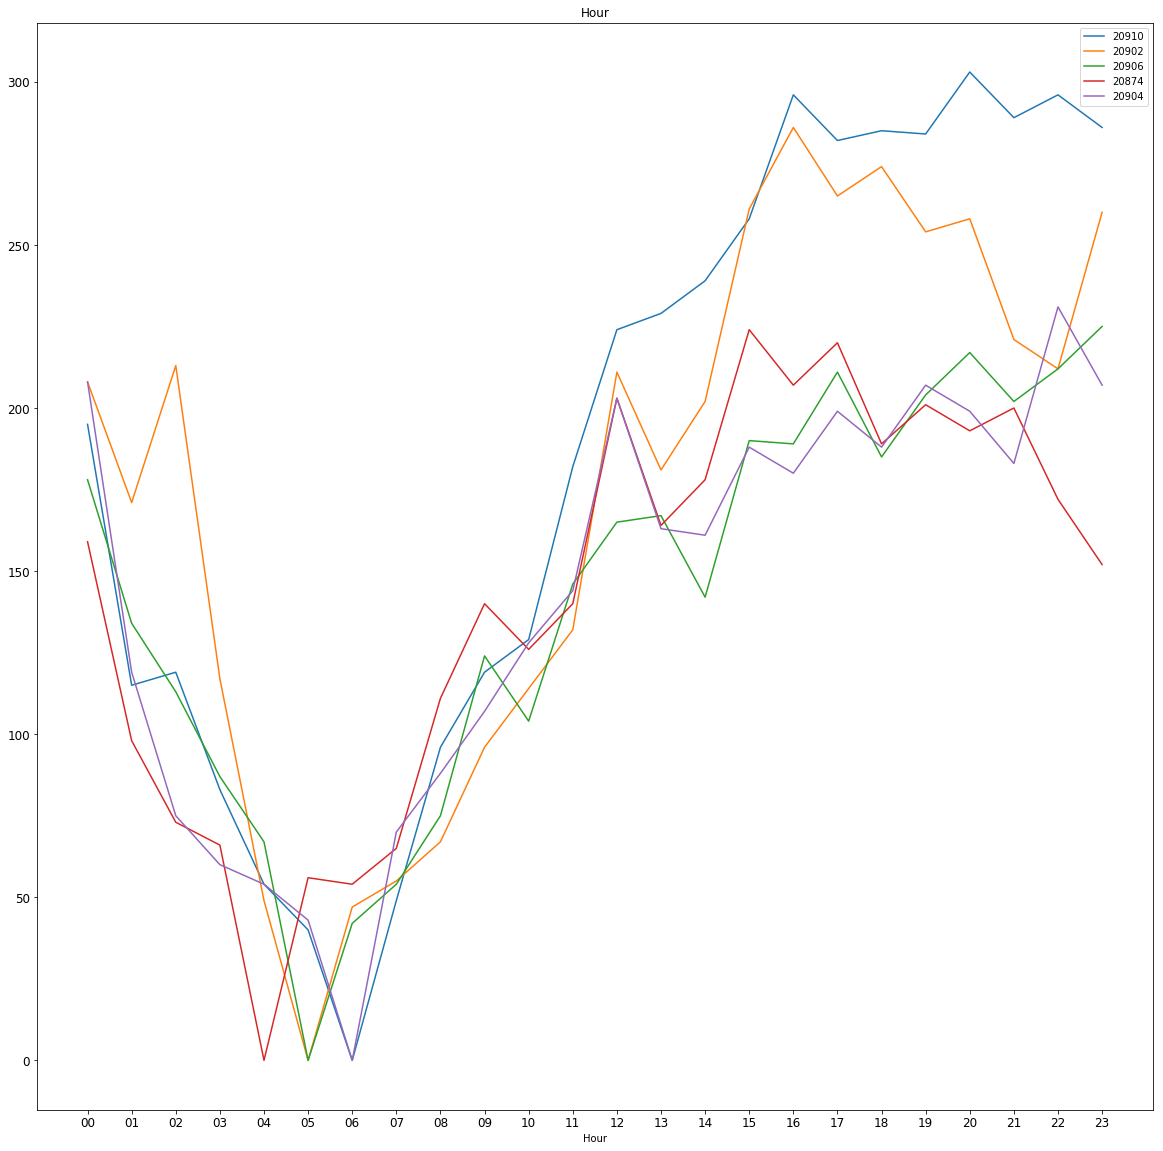

In [7]:
hourvalues = list(map(str, zip20910['Start Time'].value_counts().keys().tolist()))
hourcounts = DUDE(hourvalues, list(map(int, zip20910['Start Time'].value_counts().tolist())))
hourvalues2 = list(map(str, zip20902['Start Time'].value_counts().keys().tolist()))
hourcounts2 = DUDE(hourvalues2, list(map(int, zip20902['Start Time'].value_counts().tolist())))
hourvalues3 = list(map(str, zip20874['Start Time'].value_counts().keys().tolist()))
hourcounts3 = DUDE(hourvalues3, list(map(int, zip20874['Start Time'].value_counts().tolist())))
hourvalues4 = list(map(str, zip20904['Start Time'].value_counts().keys().tolist()))
hourcounts4 = DUDE(hourvalues4, list(map(int, zip20904['Start Time'].value_counts().tolist())))
hourvalues5 = list(map(str, zip20906['Start Time'].value_counts().keys().tolist()))
hourcounts5 = DUDE(hourvalues5, list(map(int, zip20906['Start Time'].value_counts().tolist())))
hourvalues.sort()
hour = pd.DataFrame({'Hour':hourvalues,'20910':hourcounts,'20902':hourcounts2,'20906':hourcounts5,'20874':hourcounts3,'20904':hourcounts4})
#hourbar = hour.sort_values(['Hour'])
ax = hour.plot(x = 'Hour', kind = 'line', figsize = (20,20),title = 'Hour', fontsize = 12, xticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

# Crime per Day of week

/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

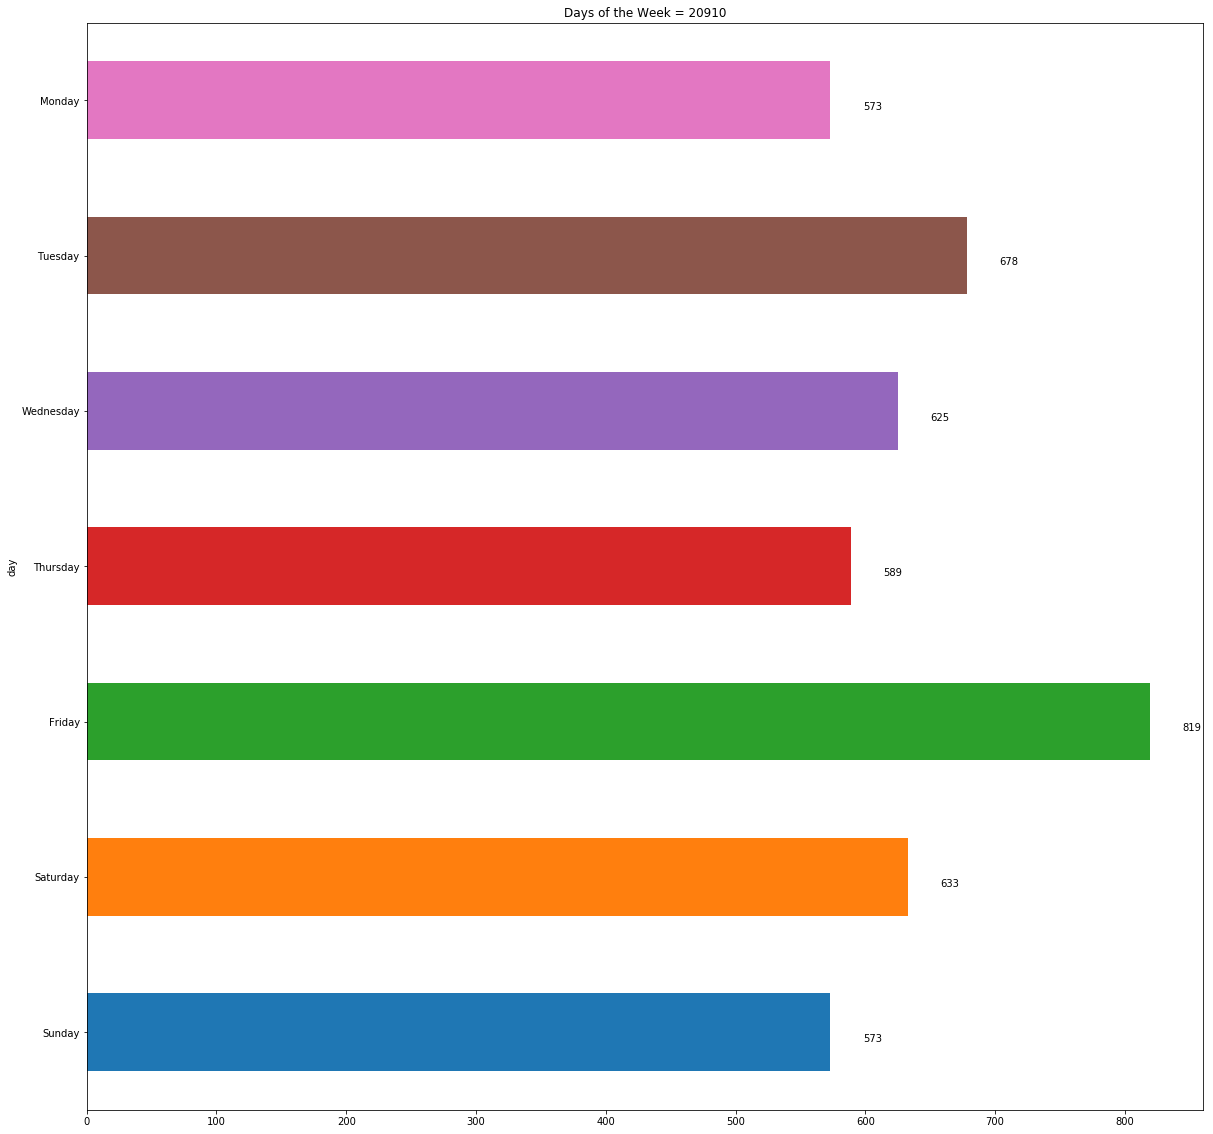

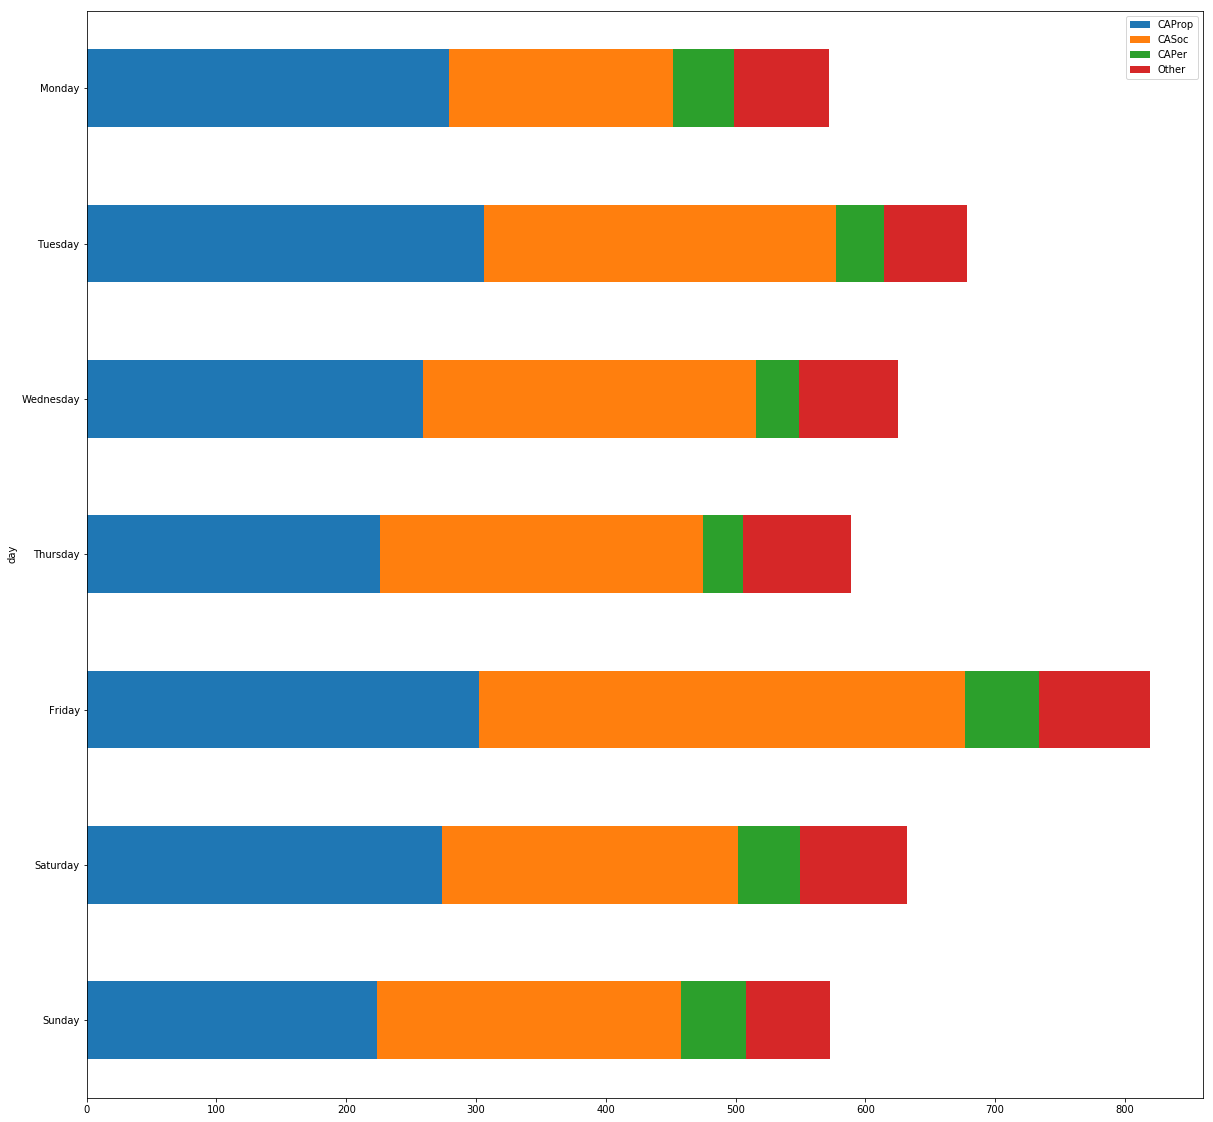

In [8]:
weekandcount(zip20910,25,"Days of the Week = 20910")

/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

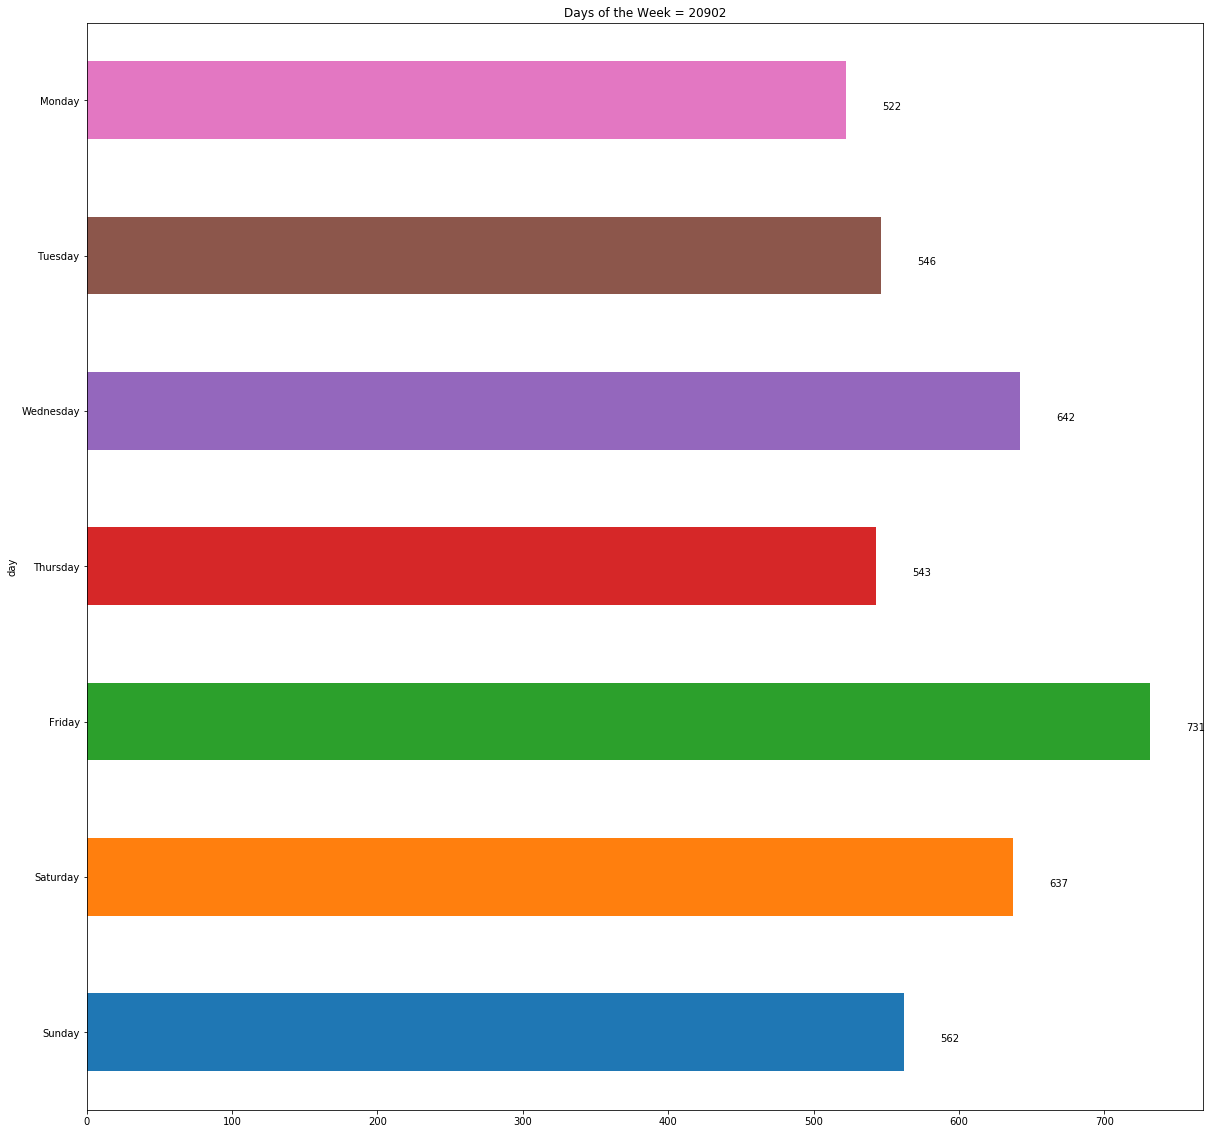

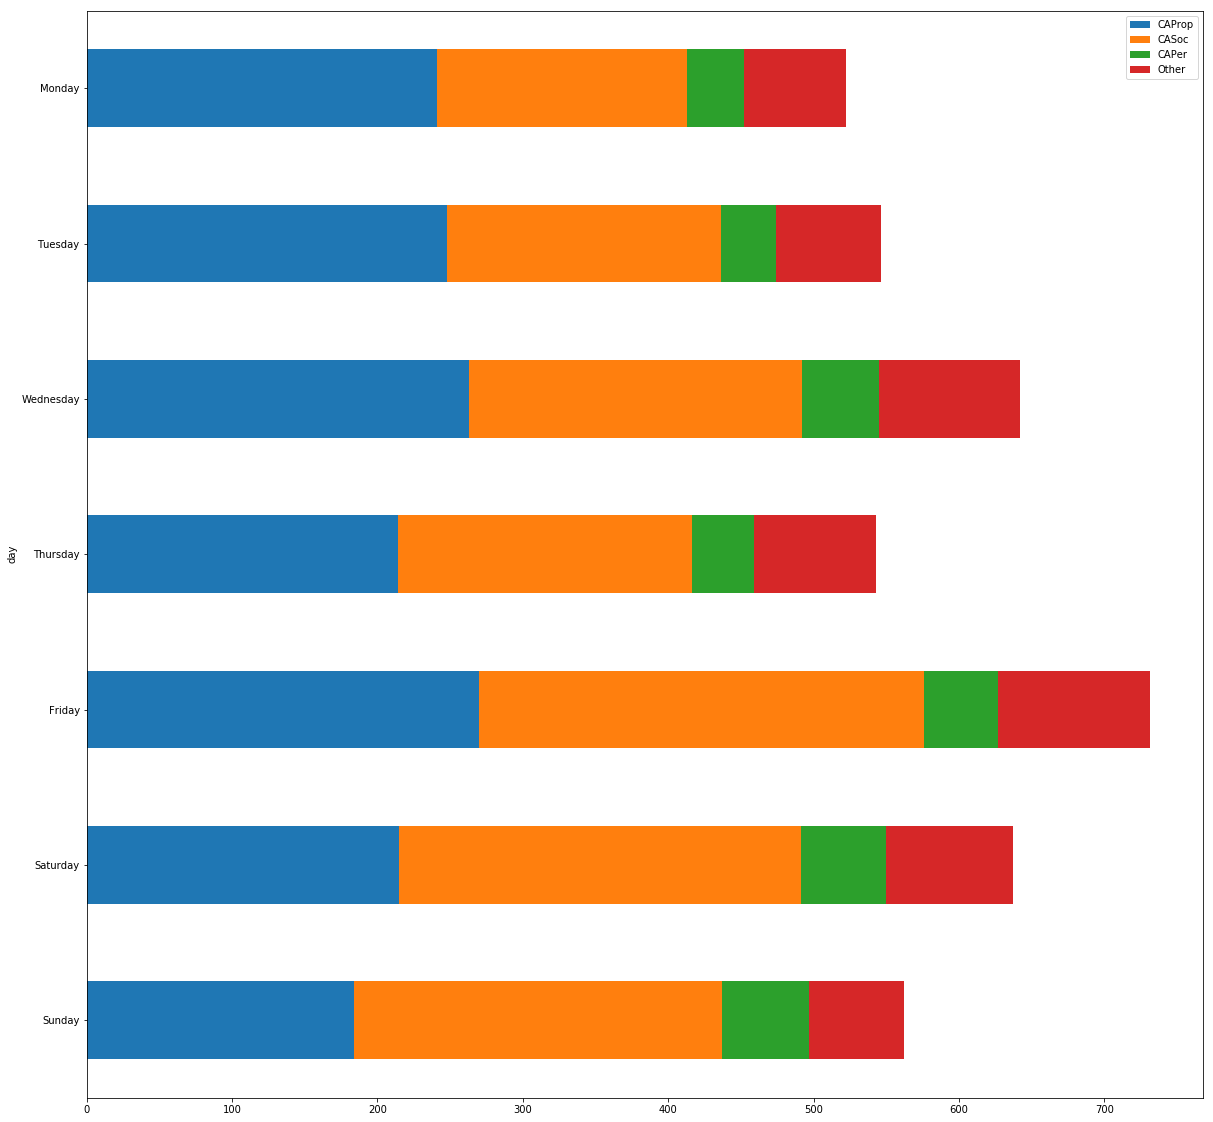

In [9]:
weekandcount(zip20902,25,"Days of the Week = 20902")

/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

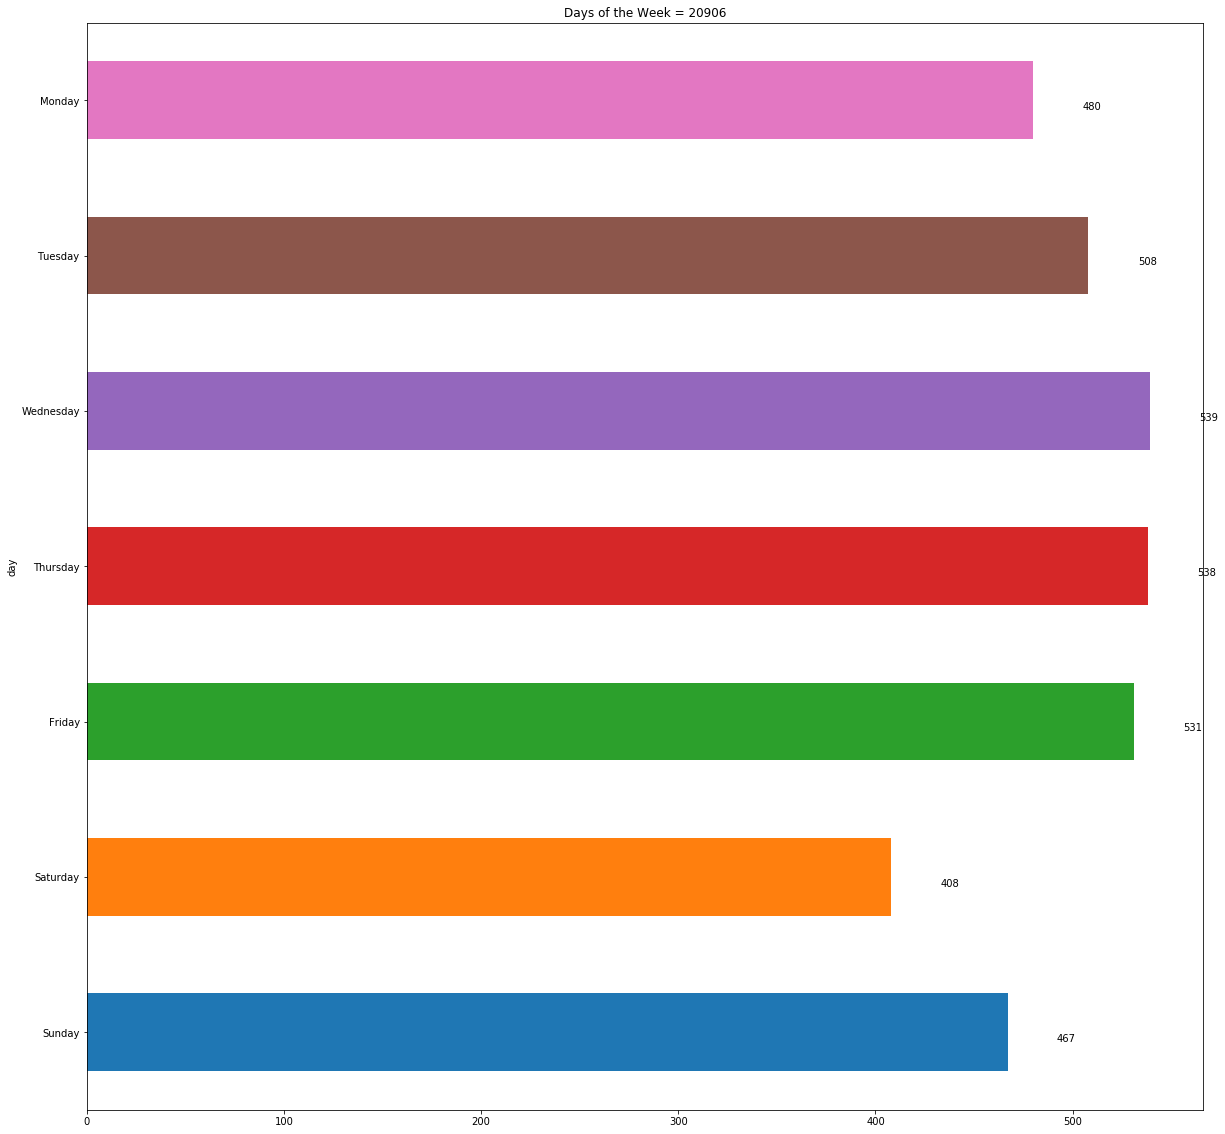

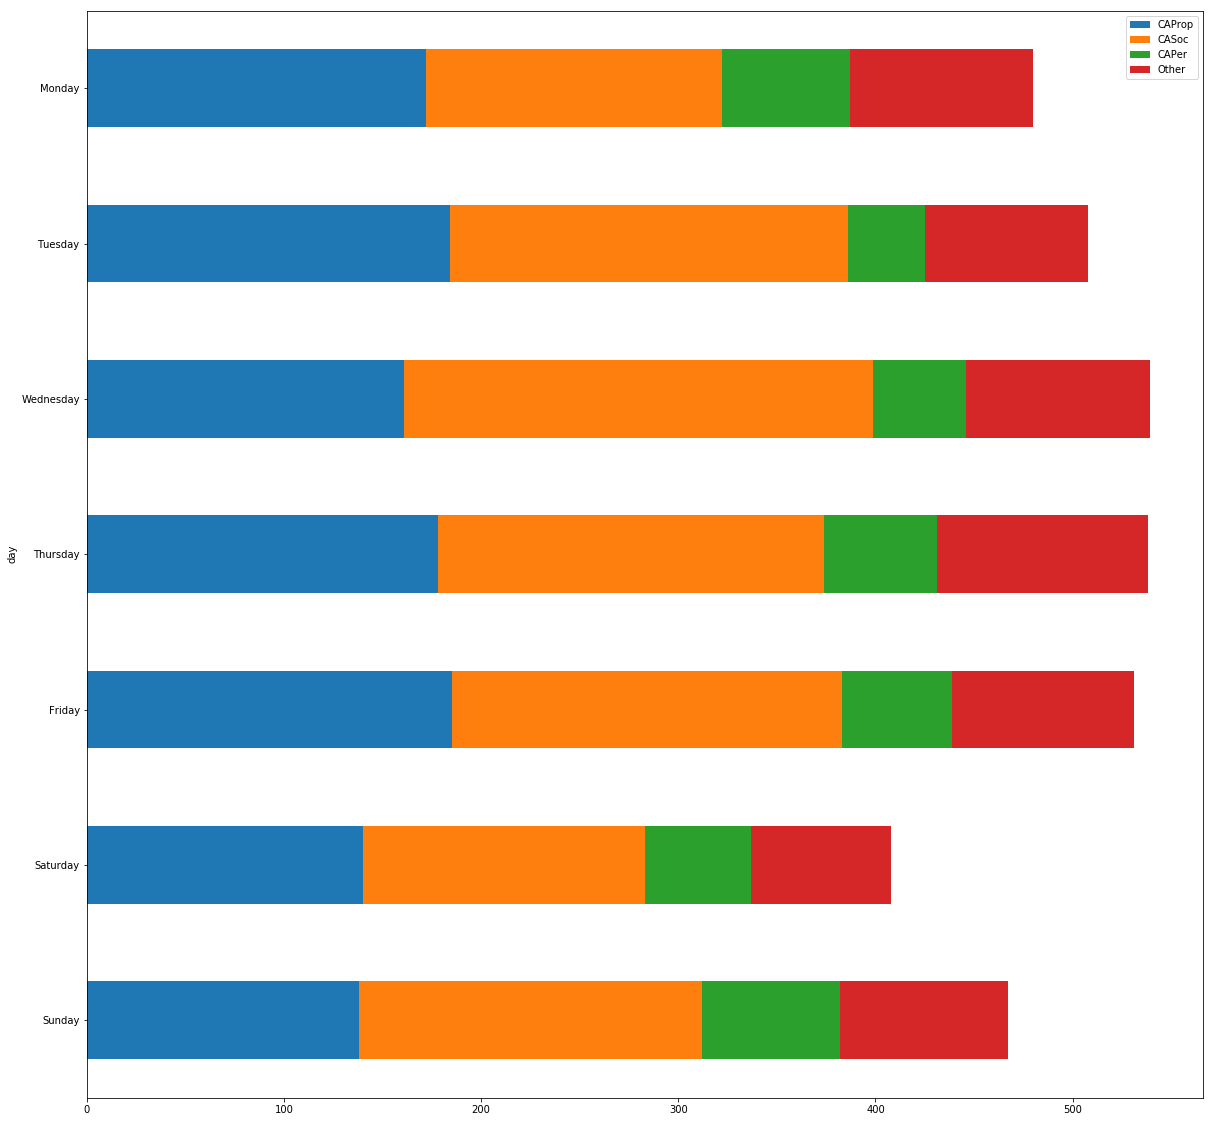

In [10]:
weekandcount(zip20906,25,"Days of the Week = 20906")

/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

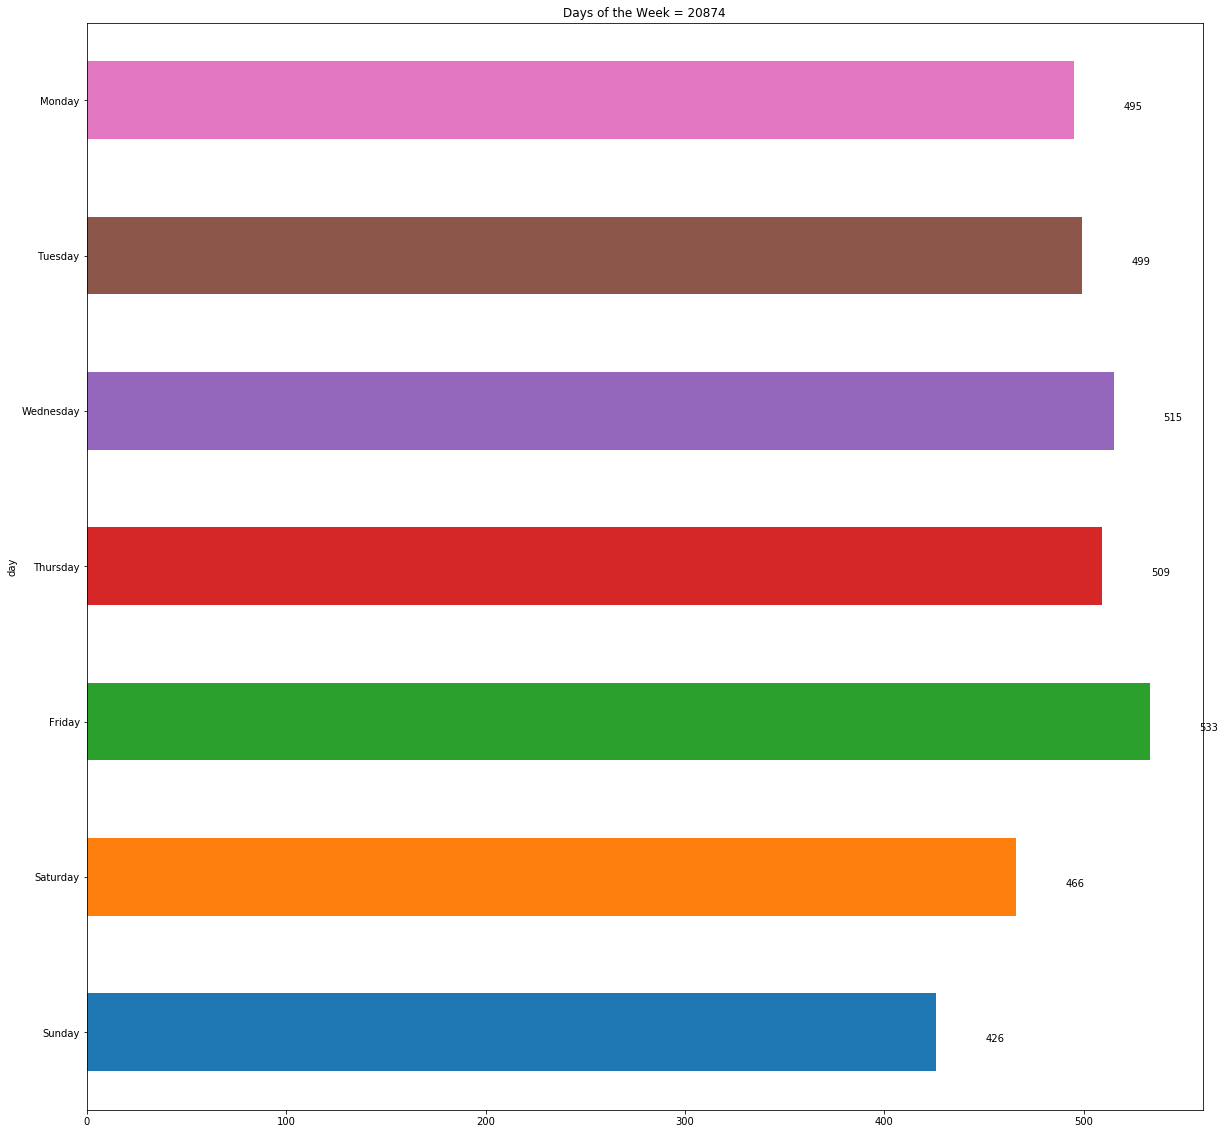

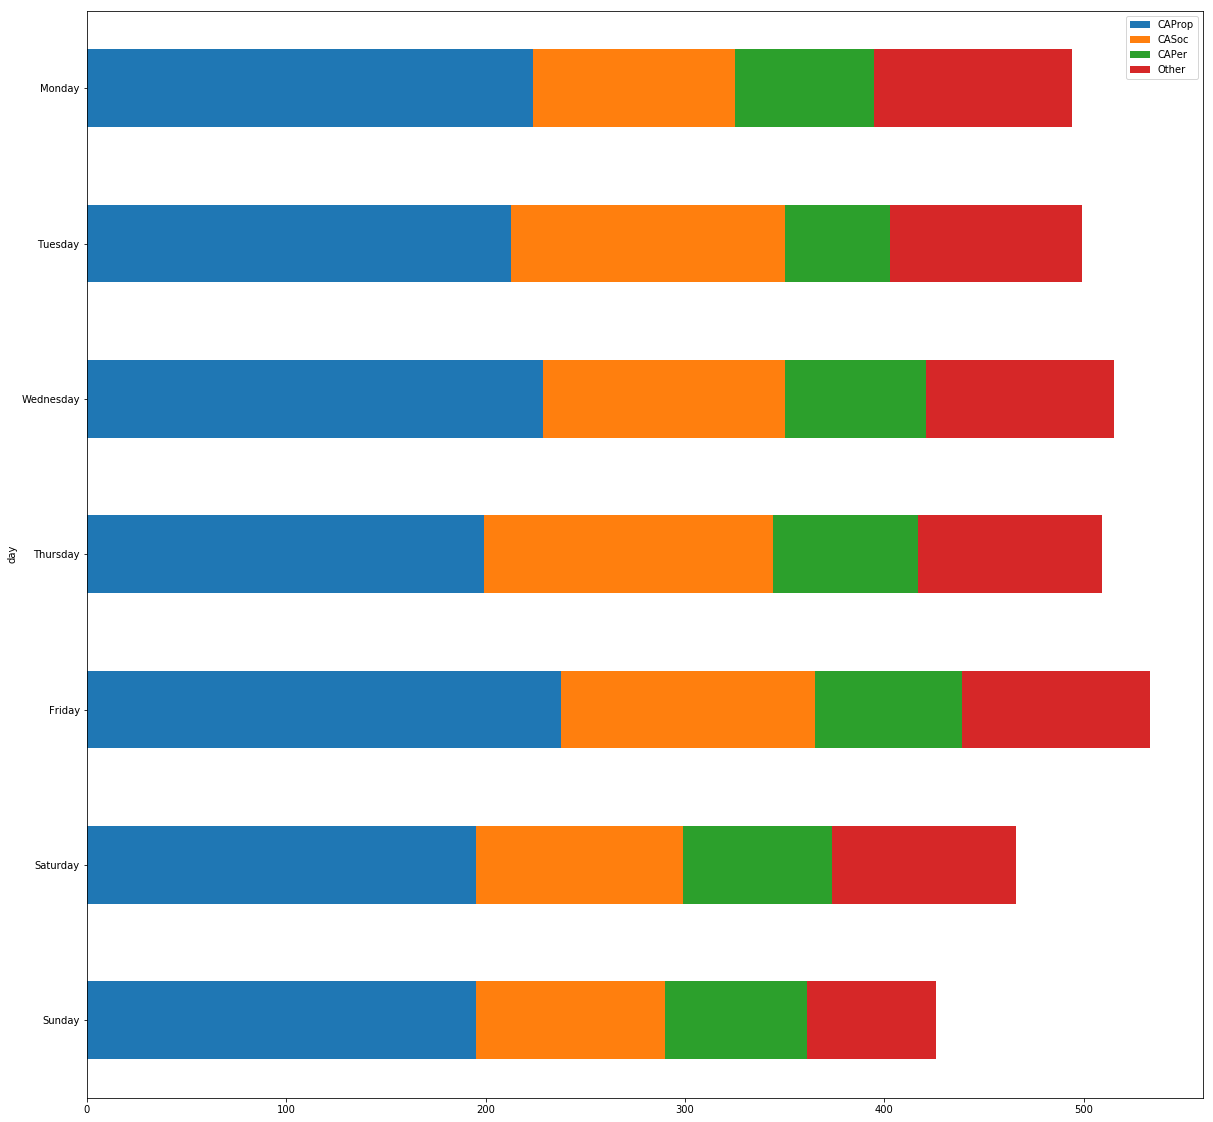

In [11]:
weekandcount(zip20874,25,"Days of the Week = 20874")

/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

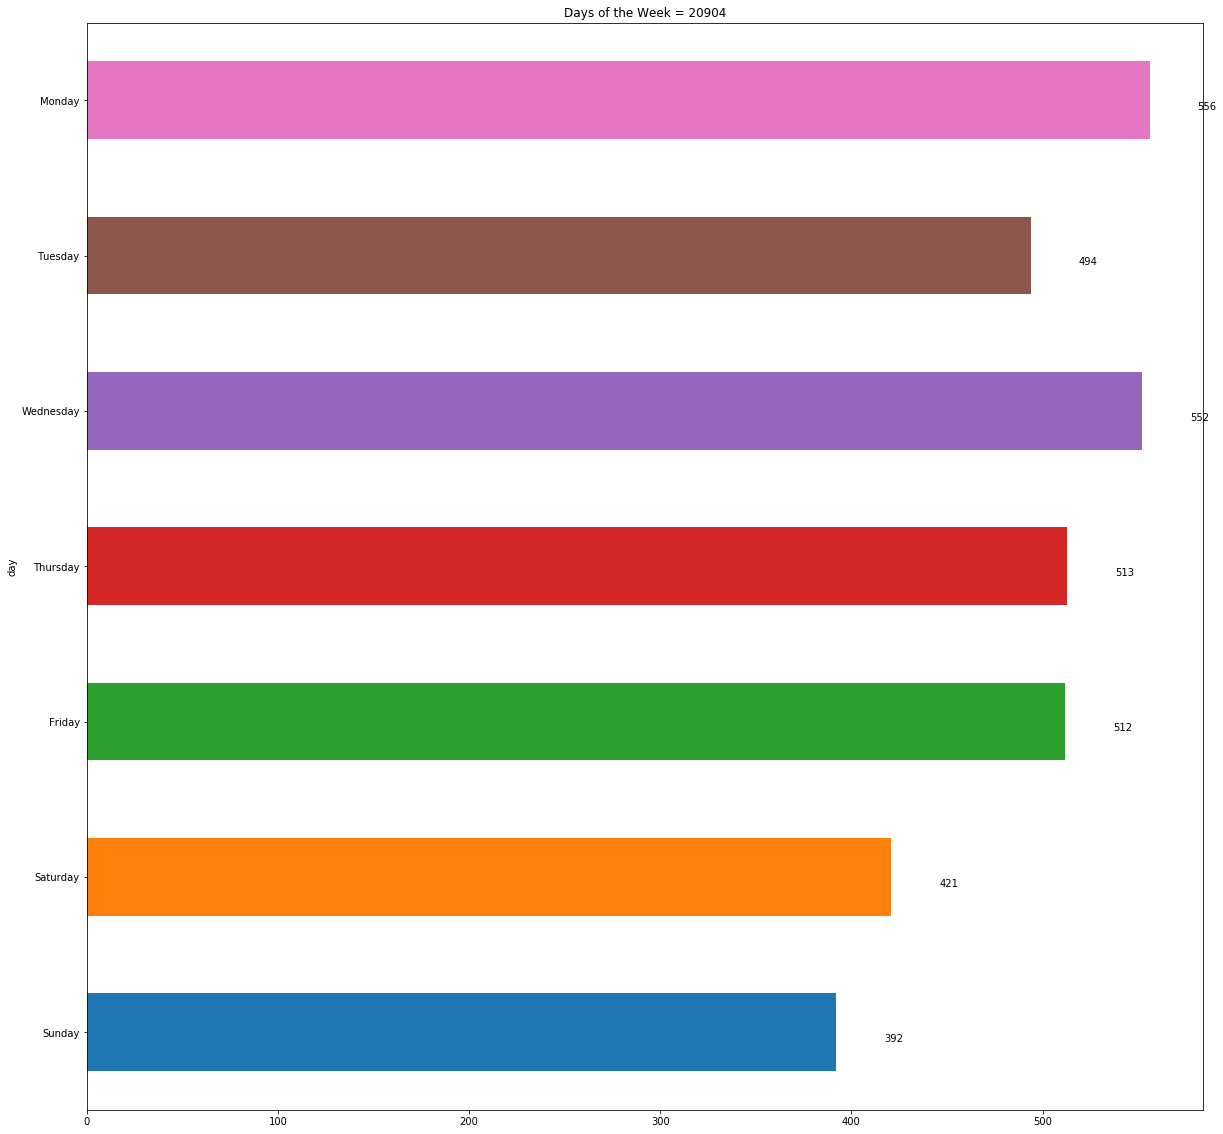

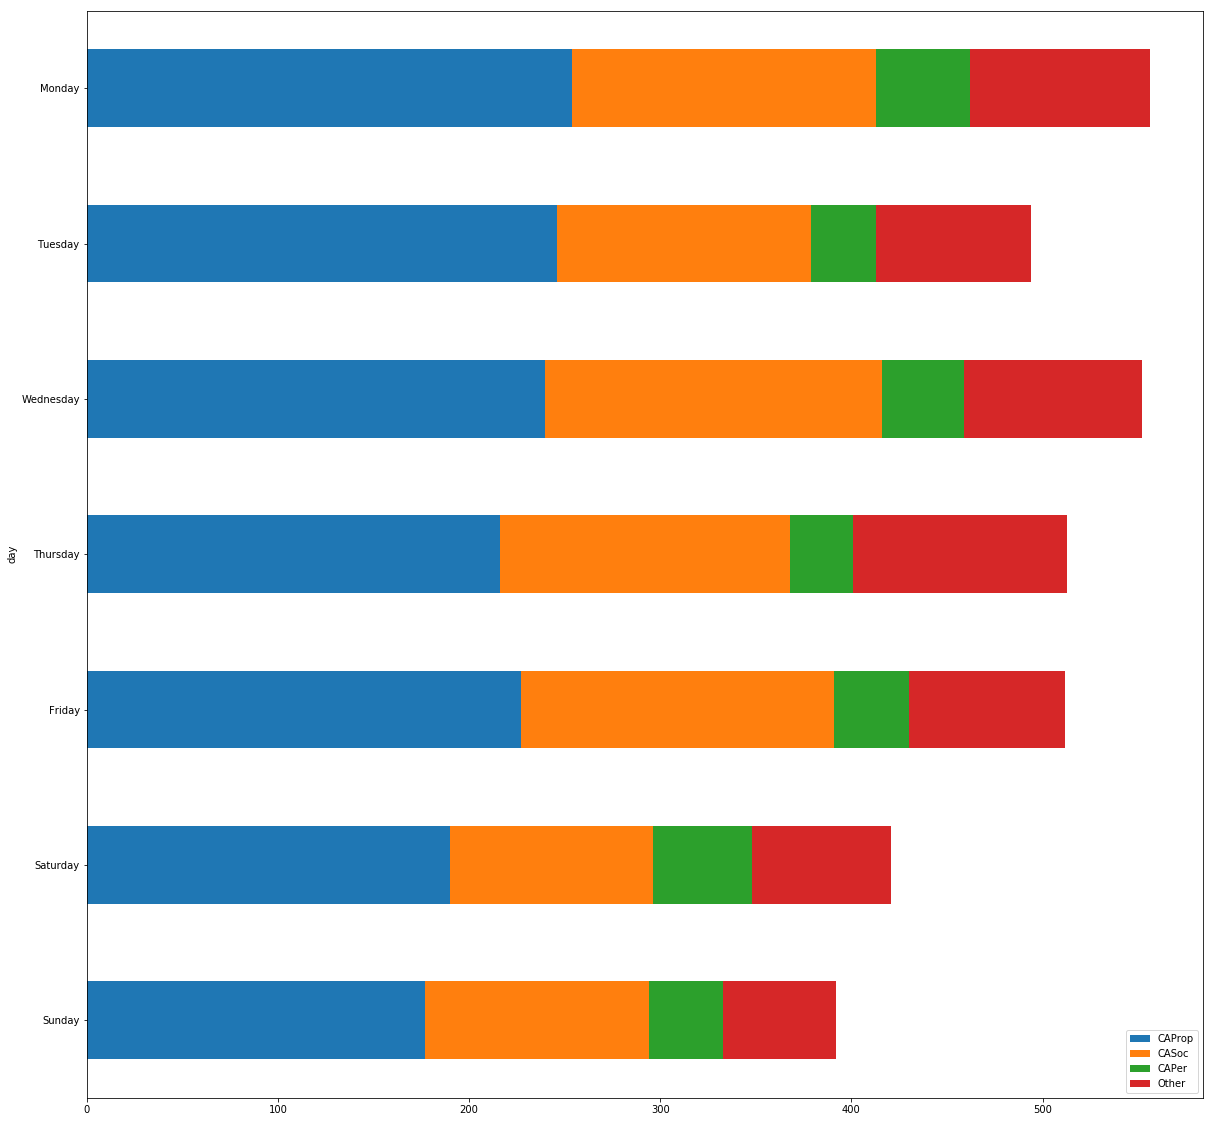

In [12]:
weekandcount(zip20904,25,"Days of the Week = 20904")

In [13]:
def dayandcount(data,w):
    datevalues = list(map(str, data['Start Date'].value_counts().keys().tolist()))
    datecounts = list(map(int, data['Start Date'].value_counts().tolist()))
    if len(datevalues) != 365:
        datevalues.append("missing")
        datecounts.append(0)
    ughh = []
    ughhh = []
    date = pd.DataFrame({'Date':datevalues,'count':datecounts})
    ugh = list(map(str,date['Date']))
    for i in range(0,len(date)):
        ughh.append(ugh[i][:2])
        ughhh.append(ugh[i][3:])
    date['month'] = ughh
    date['day'] = ughhh
    date = (date).sort_values(['Date']).reset_index()
    bruh = [0]*365
    bruh1 = [0]*365
    bruh2 = [0]*365
    bruh3 = [0]*365
    ugh = []
    datevalues.sort()
    for index, row in data.iterrows():  
        if (row['Crime Name1']) == "Crime Against Society":
            bruh1[datevalues.index(row['Start Date'])] +=1
            #print(row['Start Date'],datevalues.index(row['Start Date']),row["Crime Name1"])
            #print(bruh1)
        elif (row['Crime Name1']) == "Crime Against Person":
            bruh2[datevalues.index(row['Start Date'])] +=1
        elif(row['Crime Name1']) == "Other":
            bruh3[datevalues.index(row['Start Date'])] +=1
        elif(row['Crime Name1']) == "Crime Against Property":
            bruh[datevalues.index(row['Start Date'])] +=1

    date["Crime Against Property"] = bruh
    date["Crime Against Society"] = bruh1
    date["Crime Against Person"] = bruh2
    date["Other"] = bruh3
    #date = date.drop([0],axis = 0)
    date["Weekday"] = daysofweek = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday',
 'Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday',
 'Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday',
 'Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday',
 'Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday',
 'Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday',
 'Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday',
 'Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday',
 'Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday',
 'Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday',
 'Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    date = date.iloc[::-1]
    ax = date.plot(x = 'Date', y = 'count', kind = 'line', figsize = (20,10),title = "Date", legend = False, fontsize = 12)
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+w, i.get_y()+.19,str(i.get_width()))
    date["rolling_cap"] = date['Crime Against Property'].rolling(30).mean()
    date["rolling_cas"] = date['Crime Against Society'].rolling(30).mean()
    date["rolling_cp"] = date['Crime Against Person'].rolling(30).mean()
    date["rolling_o"] = date['Other'].rolling(30).mean()
    #ax = date.iloc[::-1].plot.barh( y = ["Crime Against Property", "Crime Against Society", "Crime Against Person", "Other"],figsize = (10,10),stacked = True,x = 'Date')
    ax = date.iloc[::-1].plot( y = ["Crime Against Property","rolling_cap"],figsize = (30,10),x = 'Date',xticks = [i for i in range (0,366,10)])
    ax = date.iloc[::-1].plot( y = ["Crime Against Society","rolling_cas"],figsize = (30,10),x = 'Date',xticks = [i for i in range (0,366,10)])
    ax = date.iloc[::-1].plot( y = ["Crime Against Person","rolling_cp"],figsize = (30,10),x = 'Date',xticks = [i for i in range (0,366,10)])
    ax = date.iloc[::-1].plot( y = ["Other","rolling_o"],figsize = (30,10),x = 'Date',xticks = [i for i in range (1,366,10)])
    return date

# Crime by Day

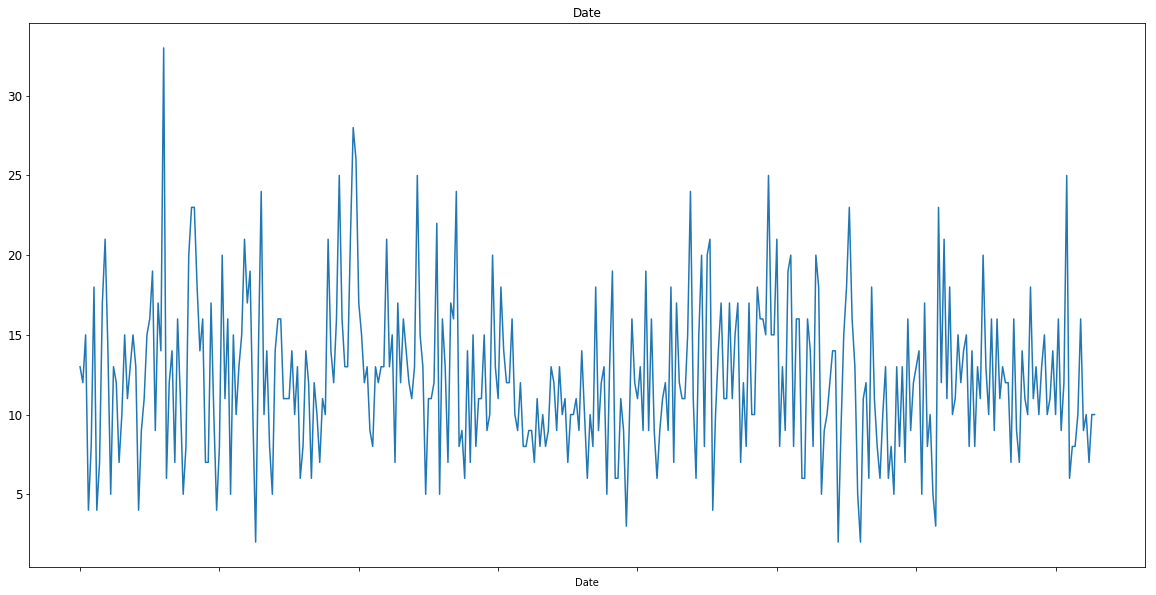

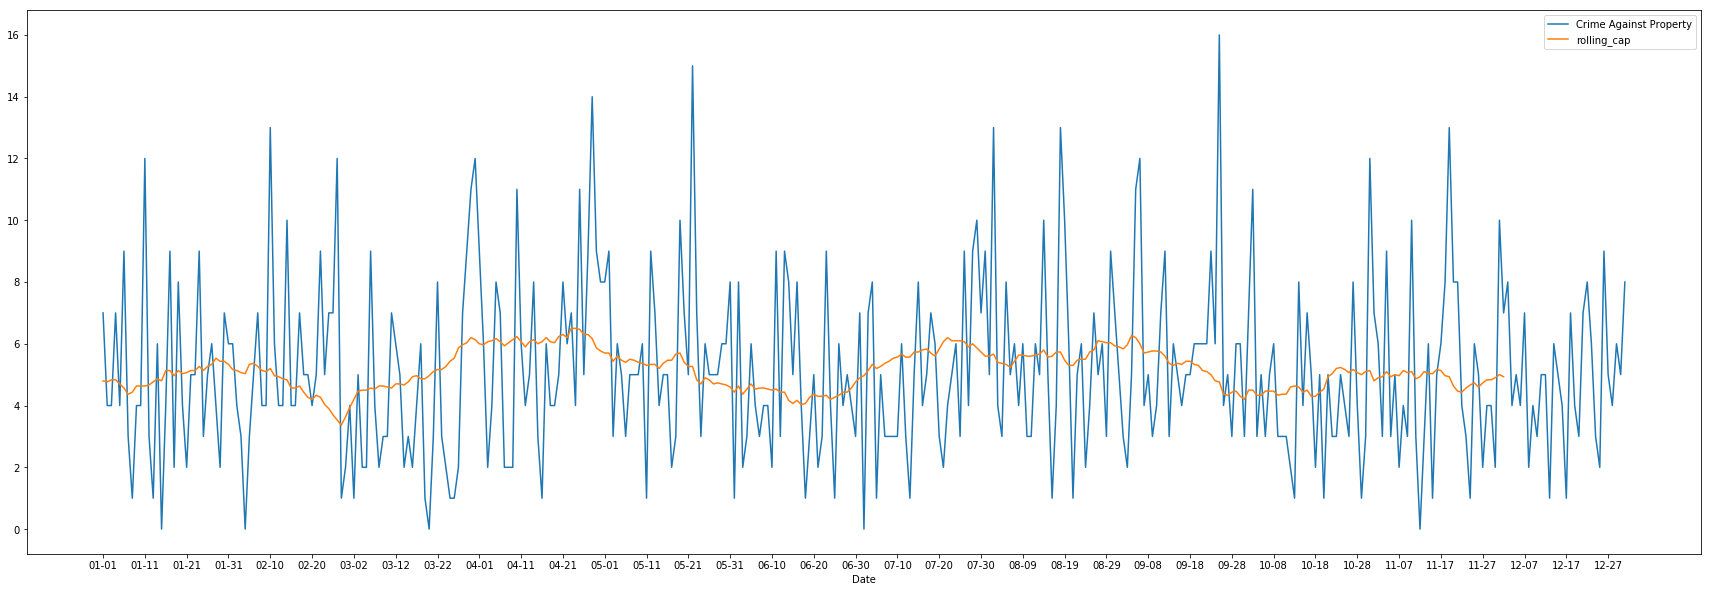

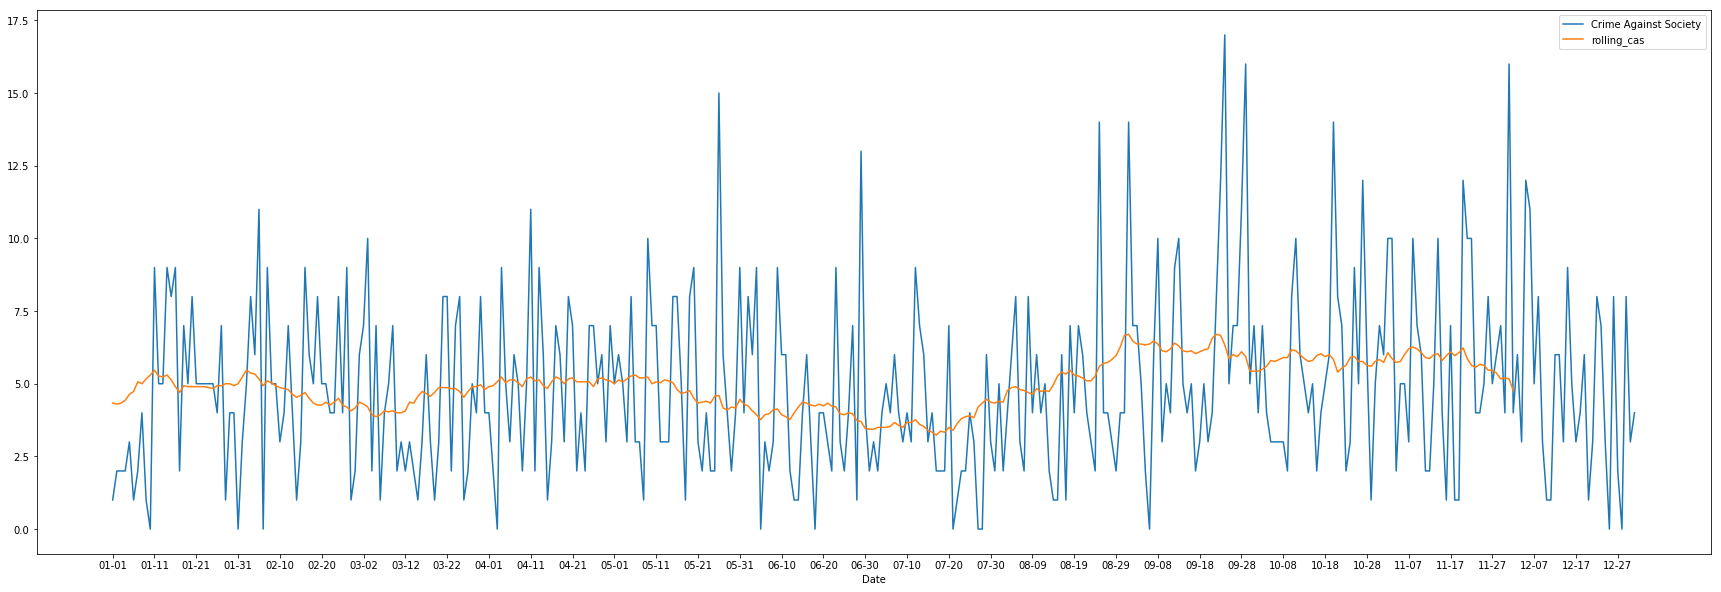

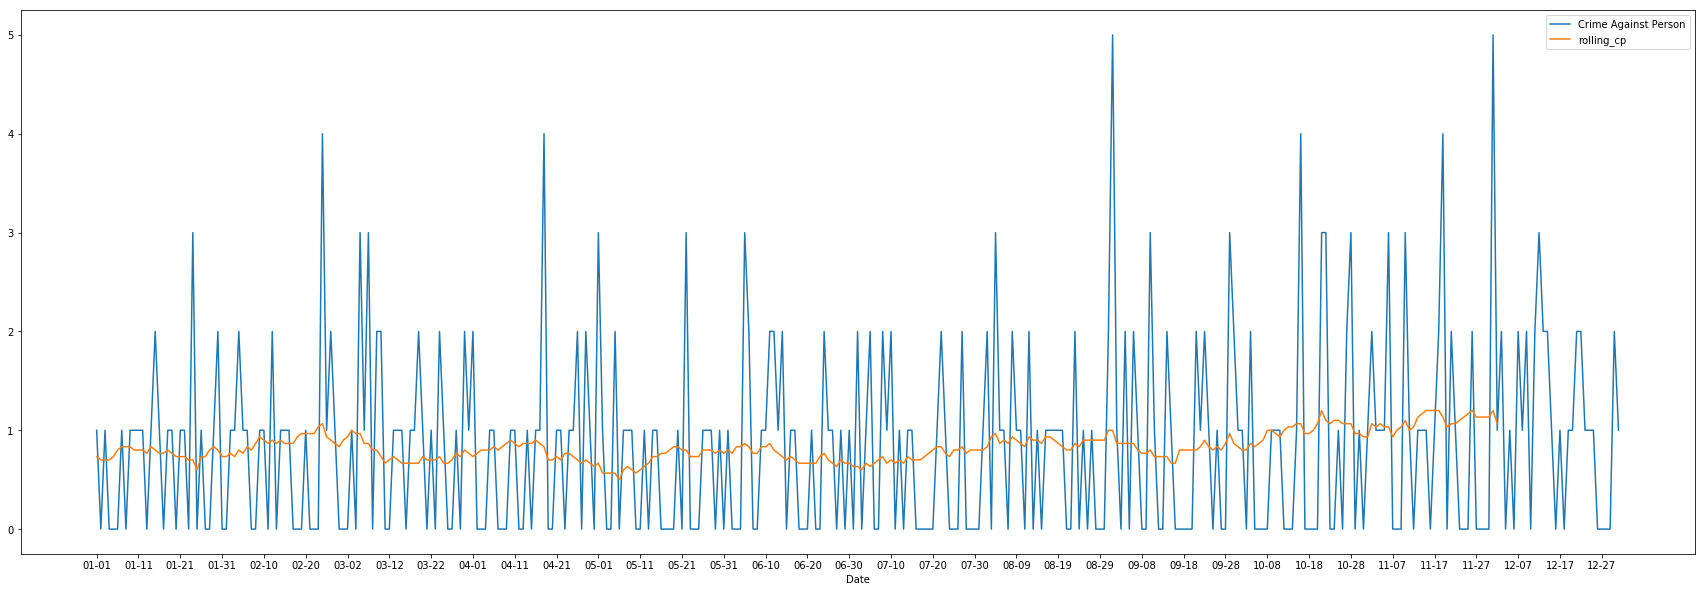

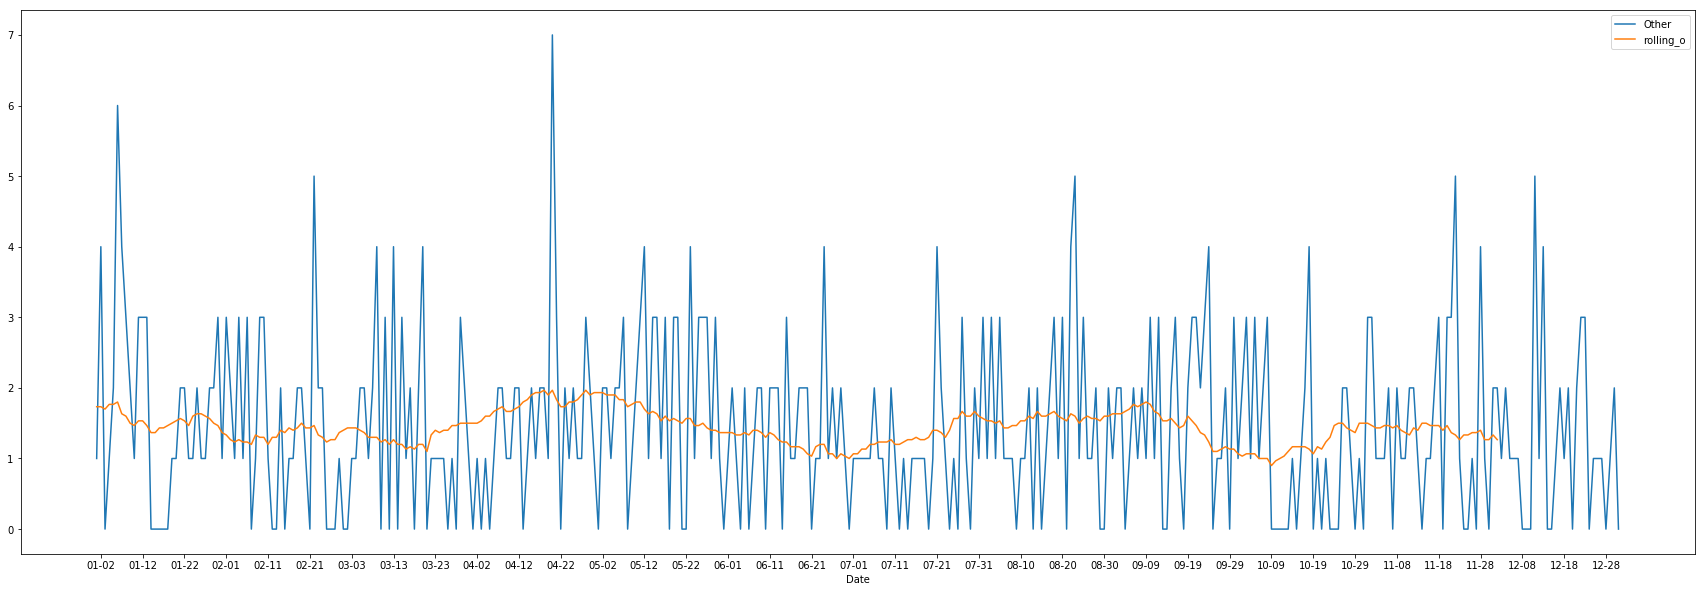

In [14]:
date1 = dayandcount(zip20910,2)

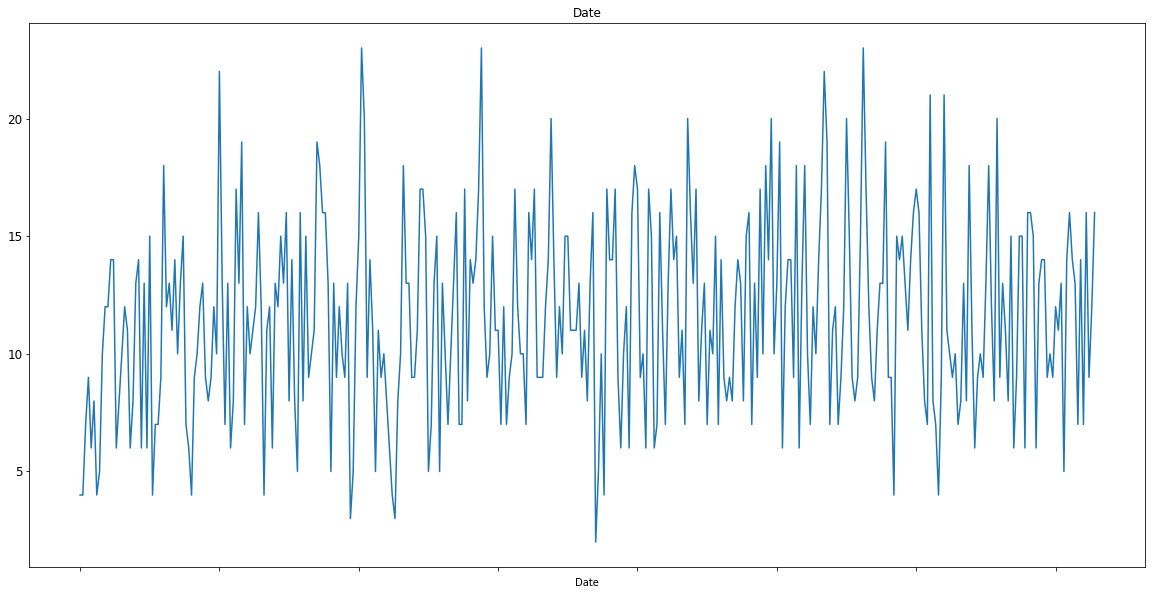

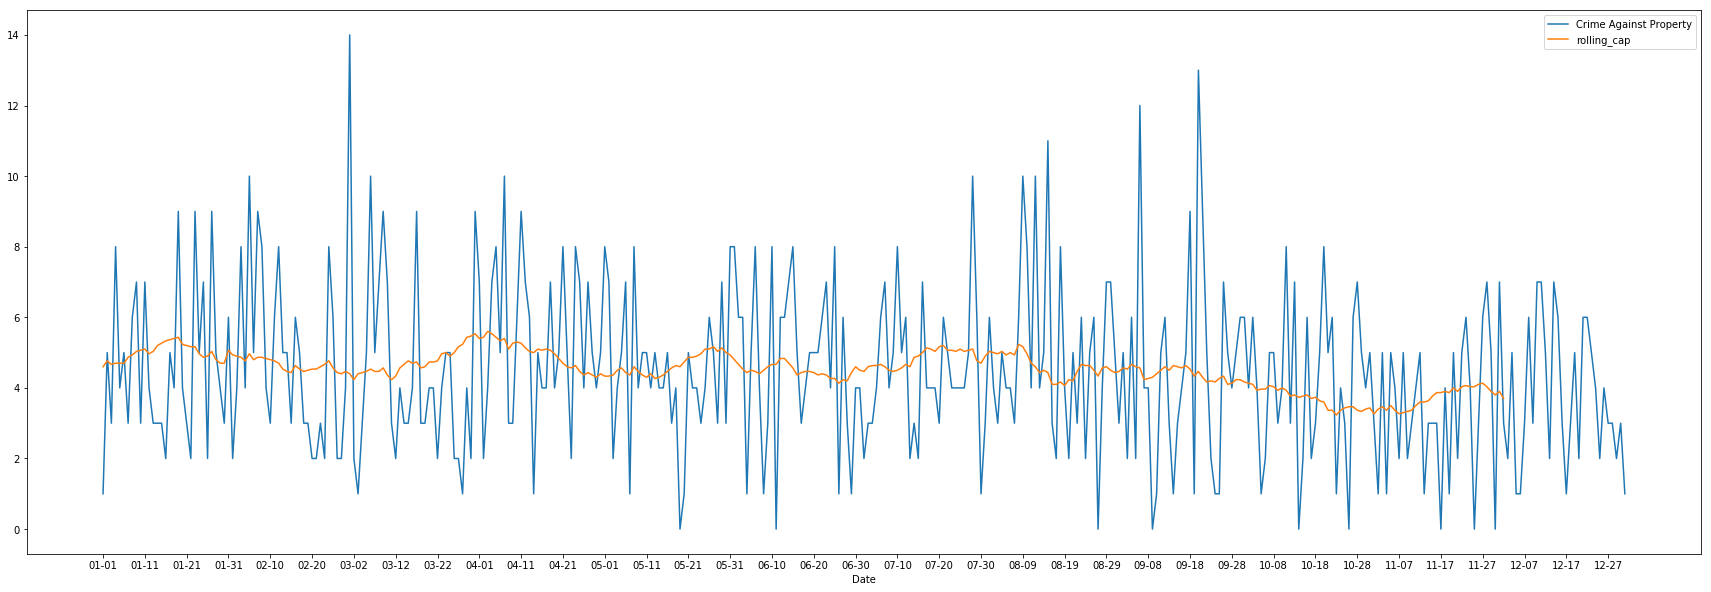

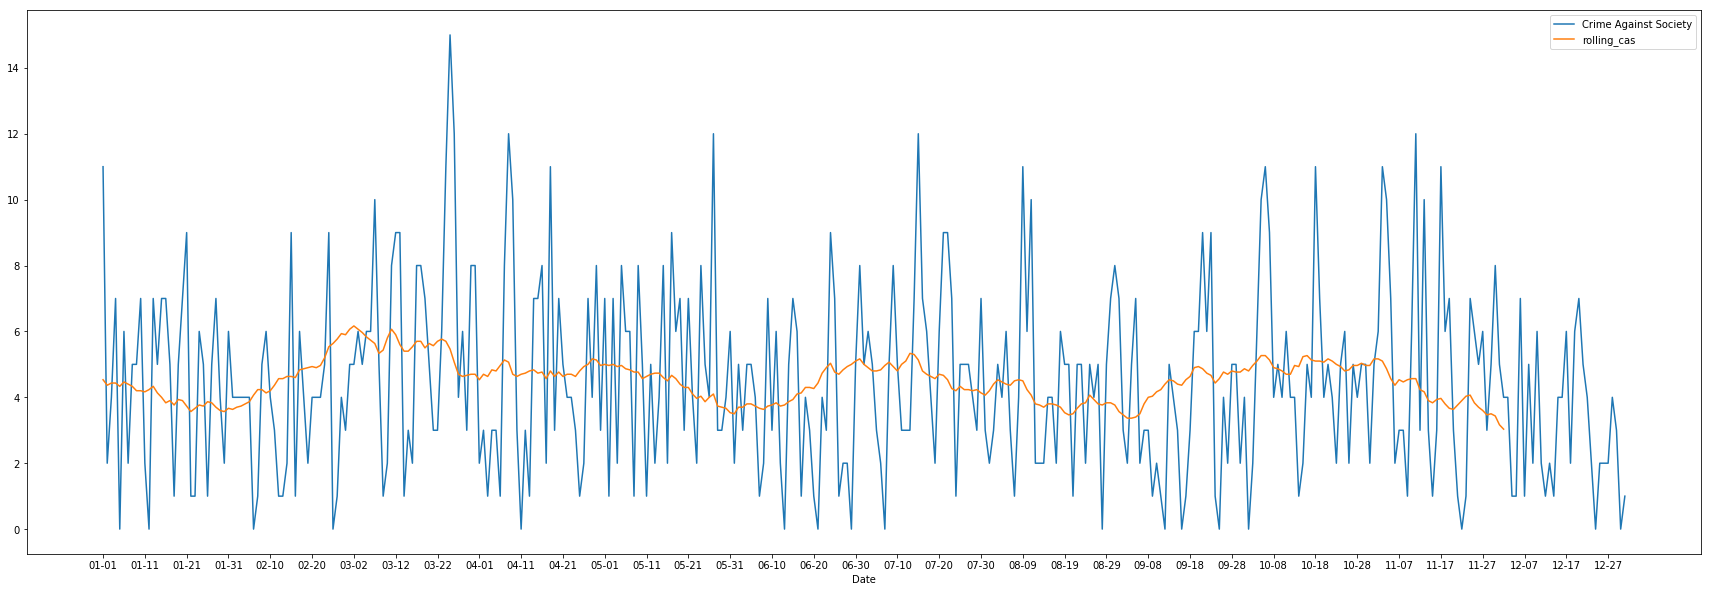

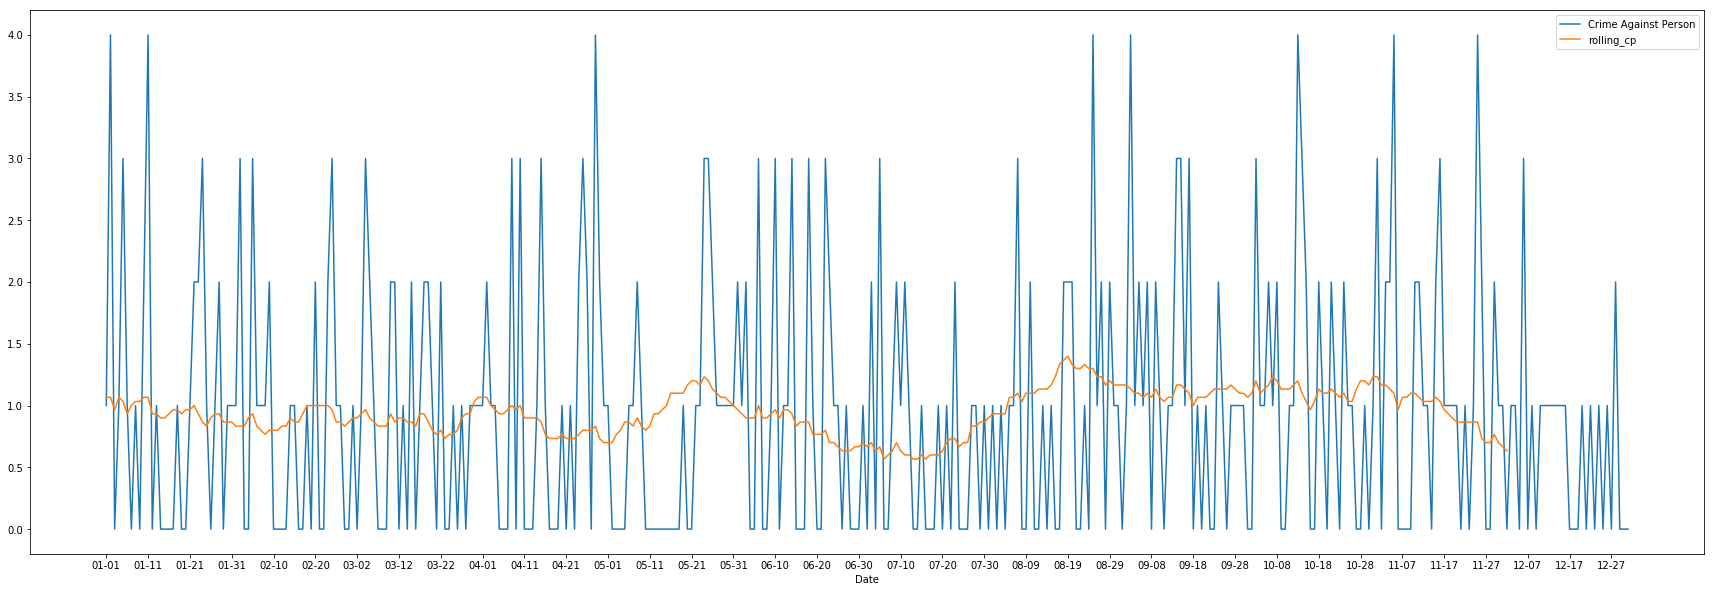

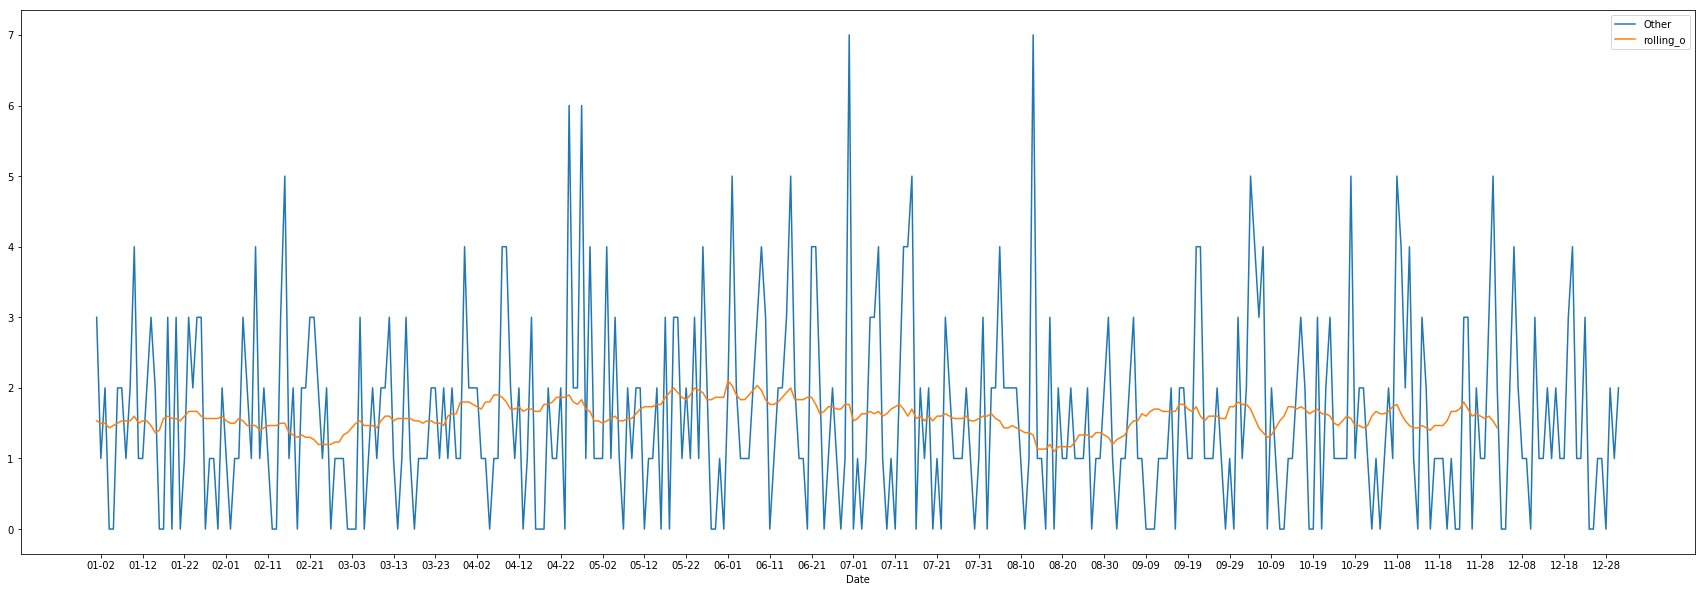

In [15]:
date2 = dayandcount(zip20902,2)

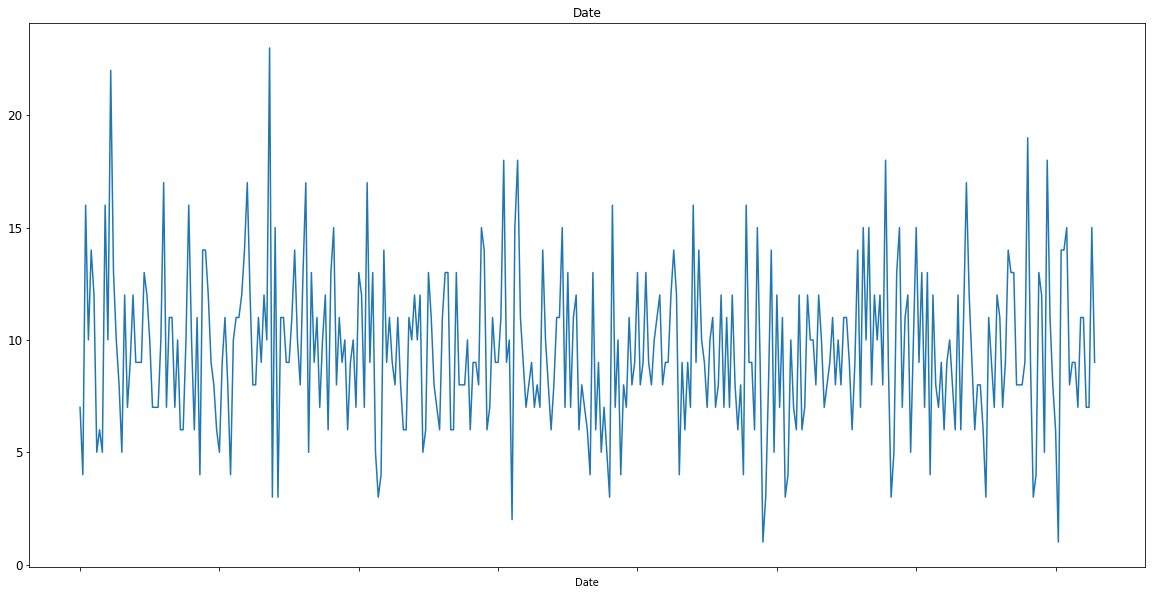

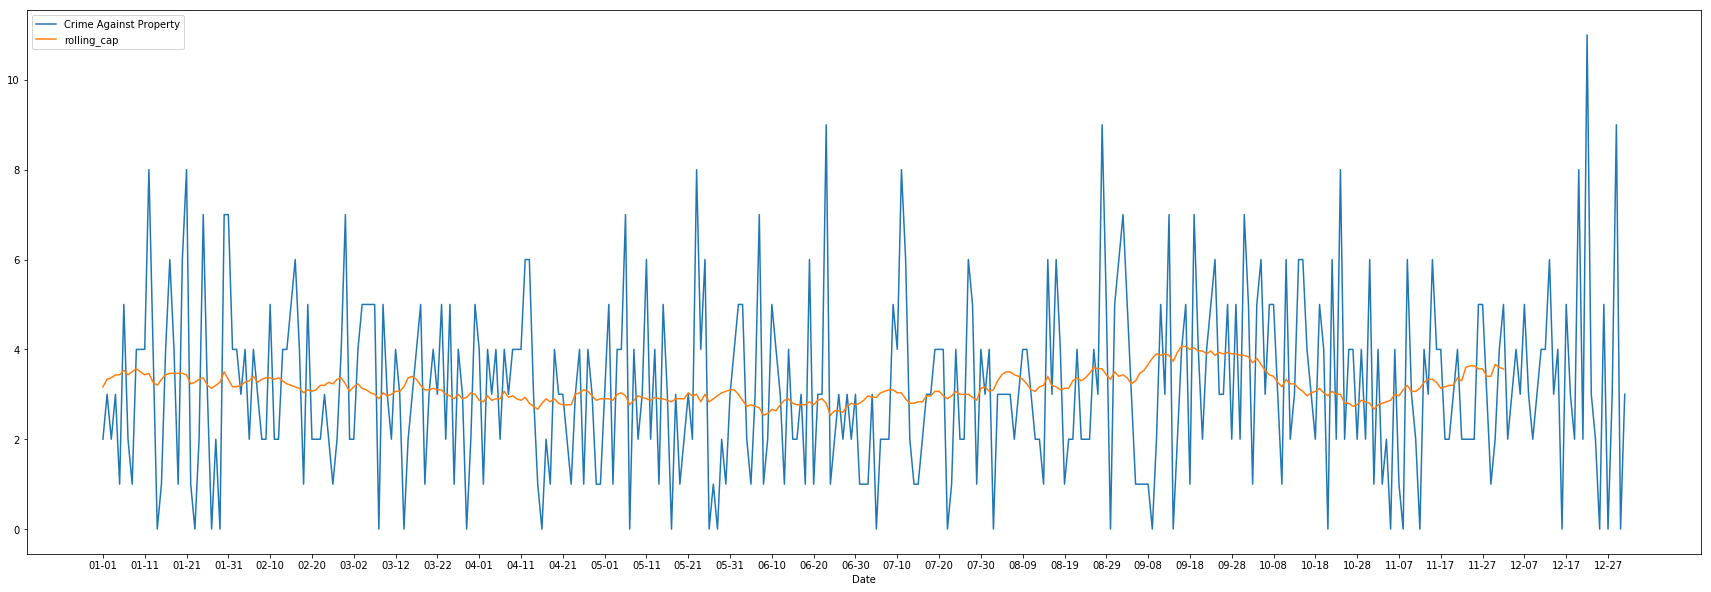

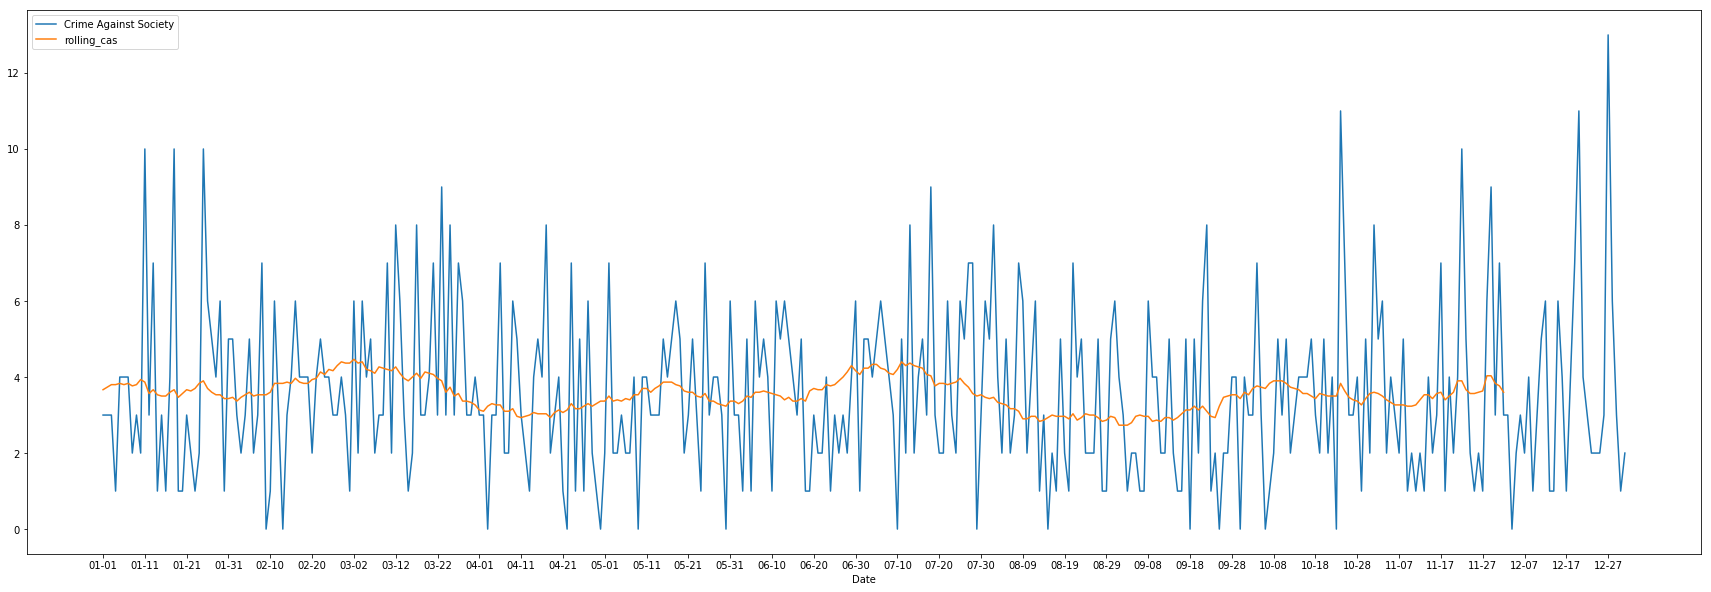

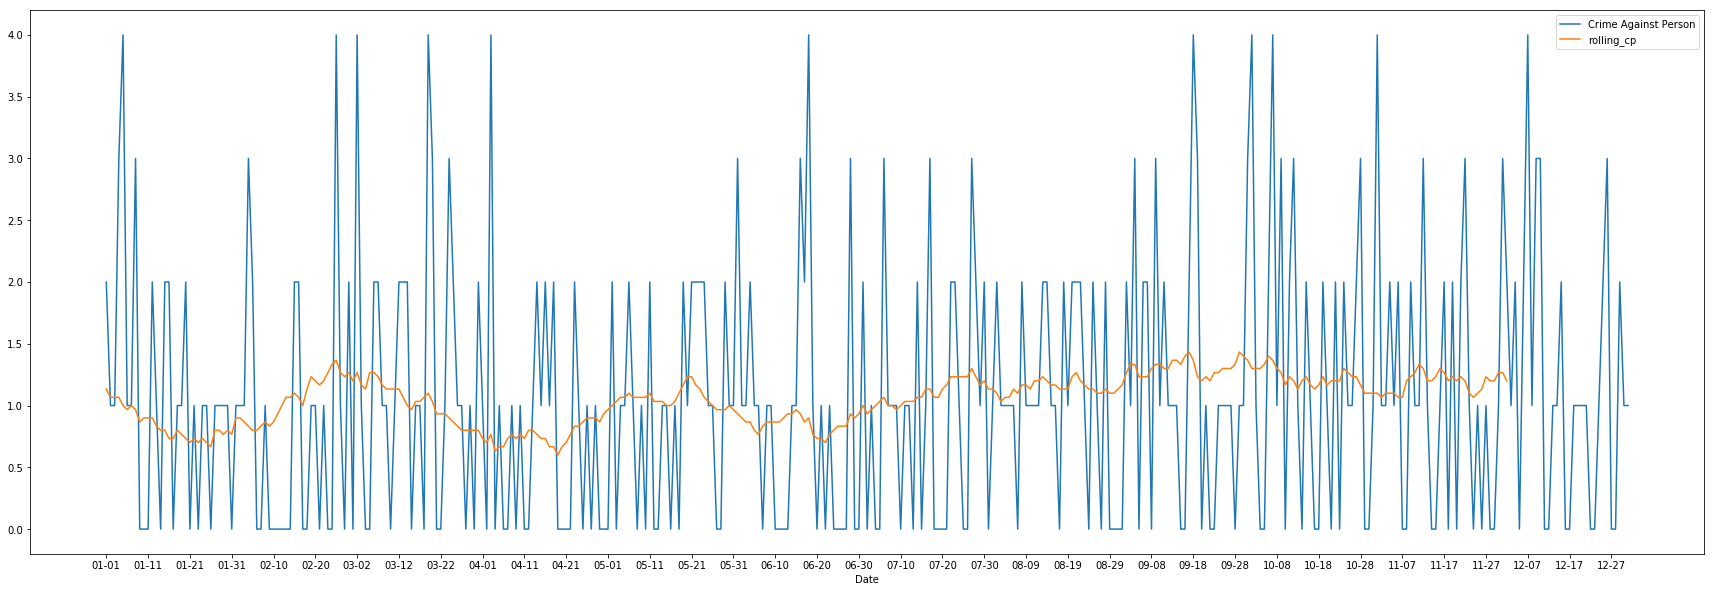

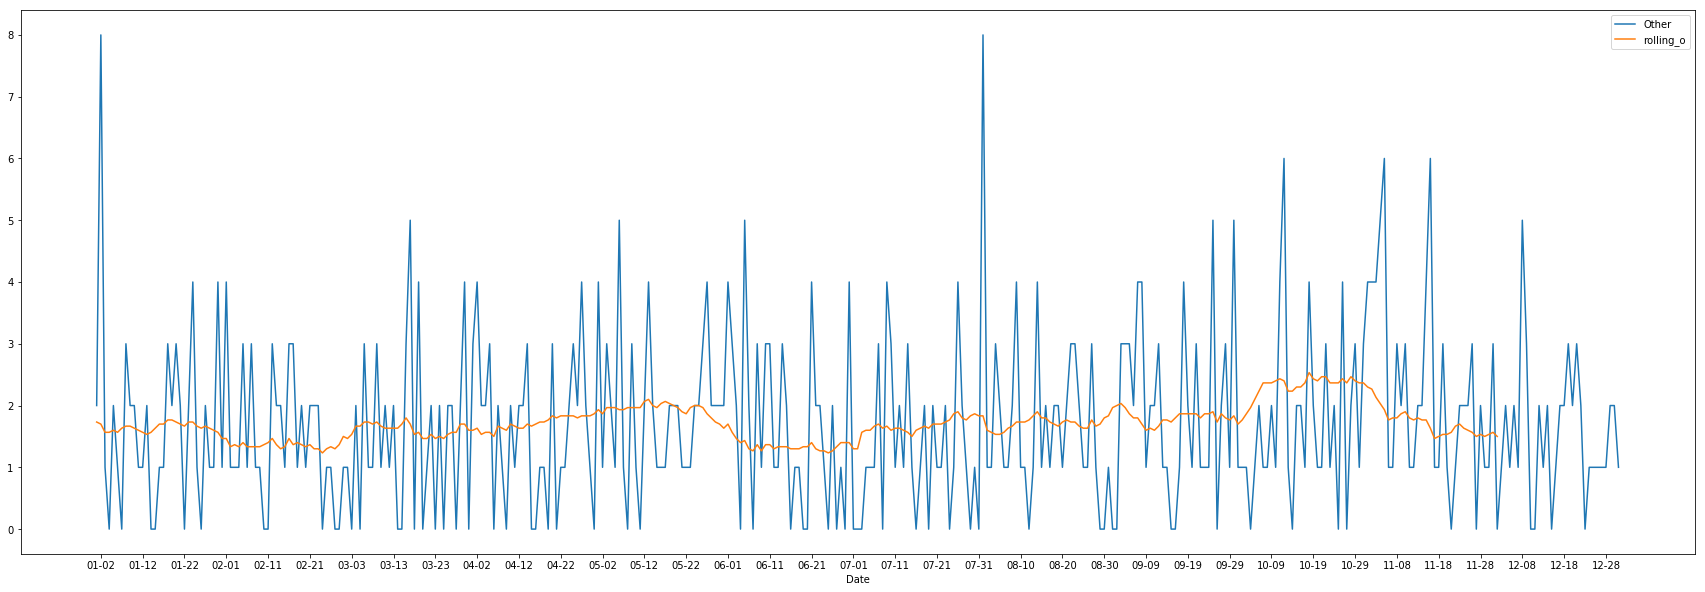

In [16]:
date5 = dayandcount(zip20906,2)

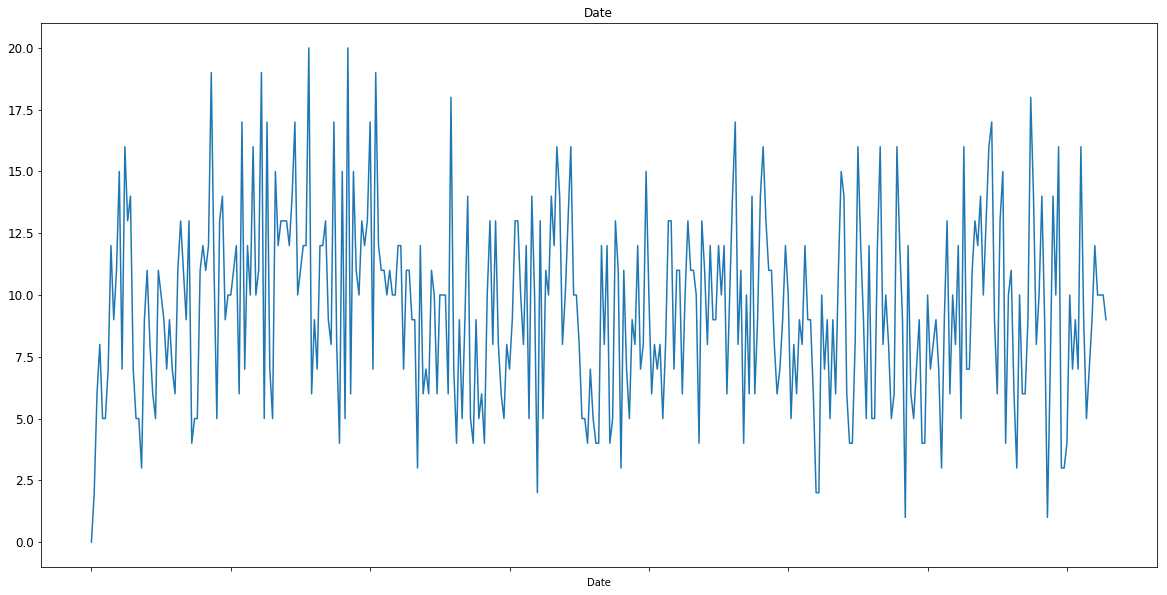

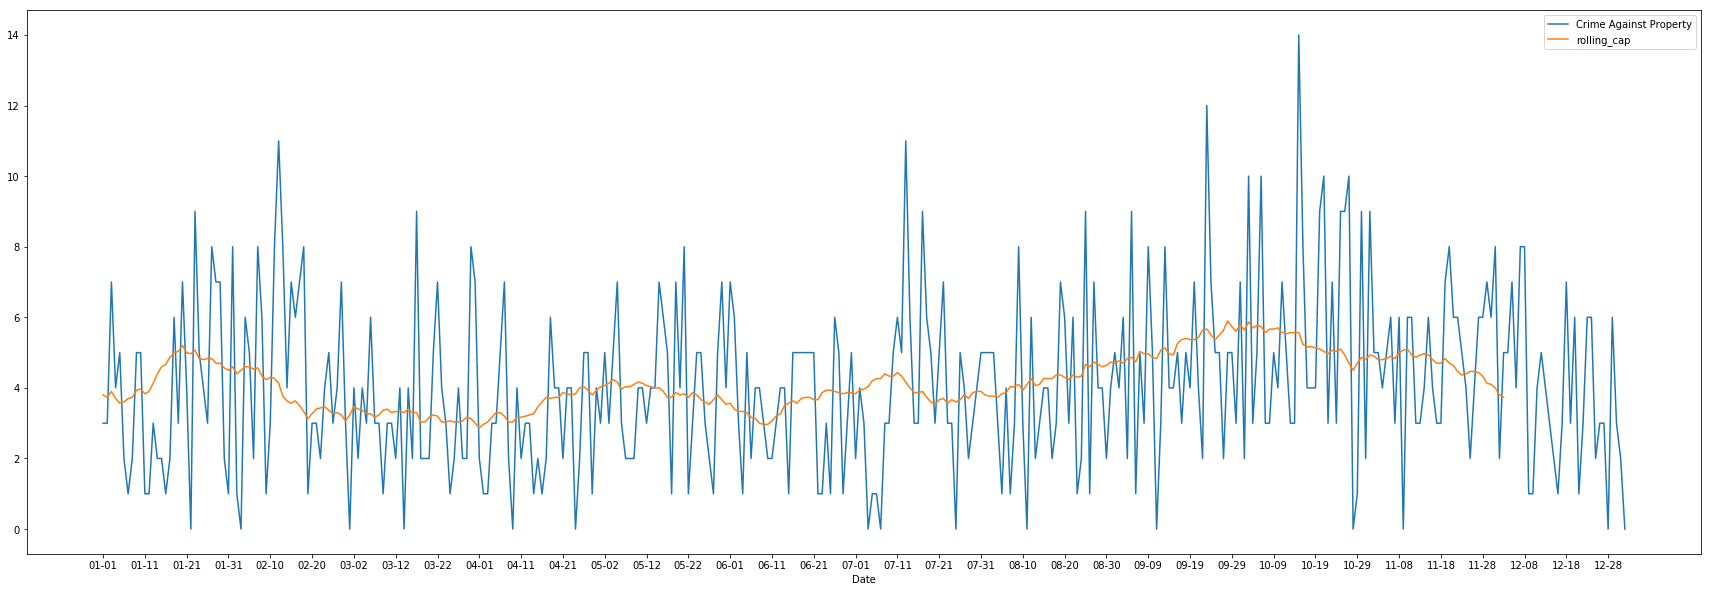

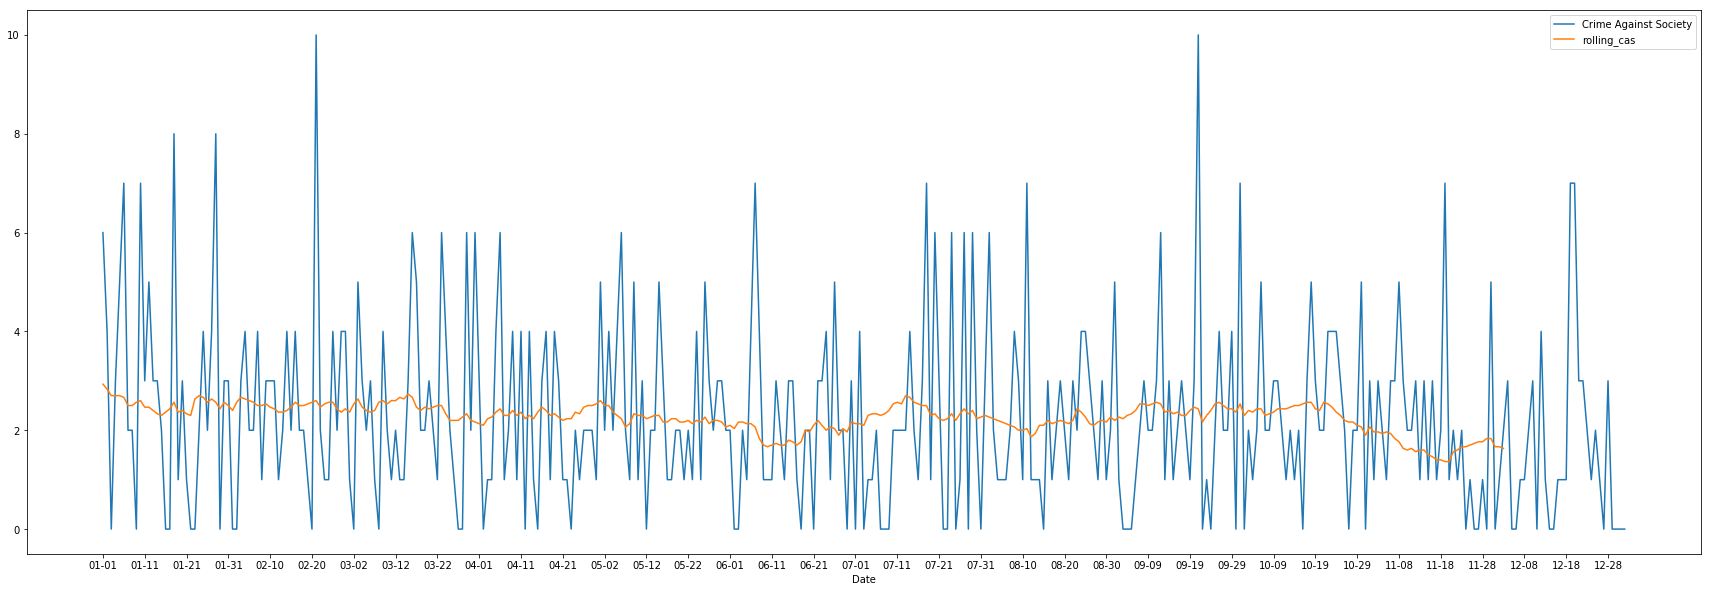

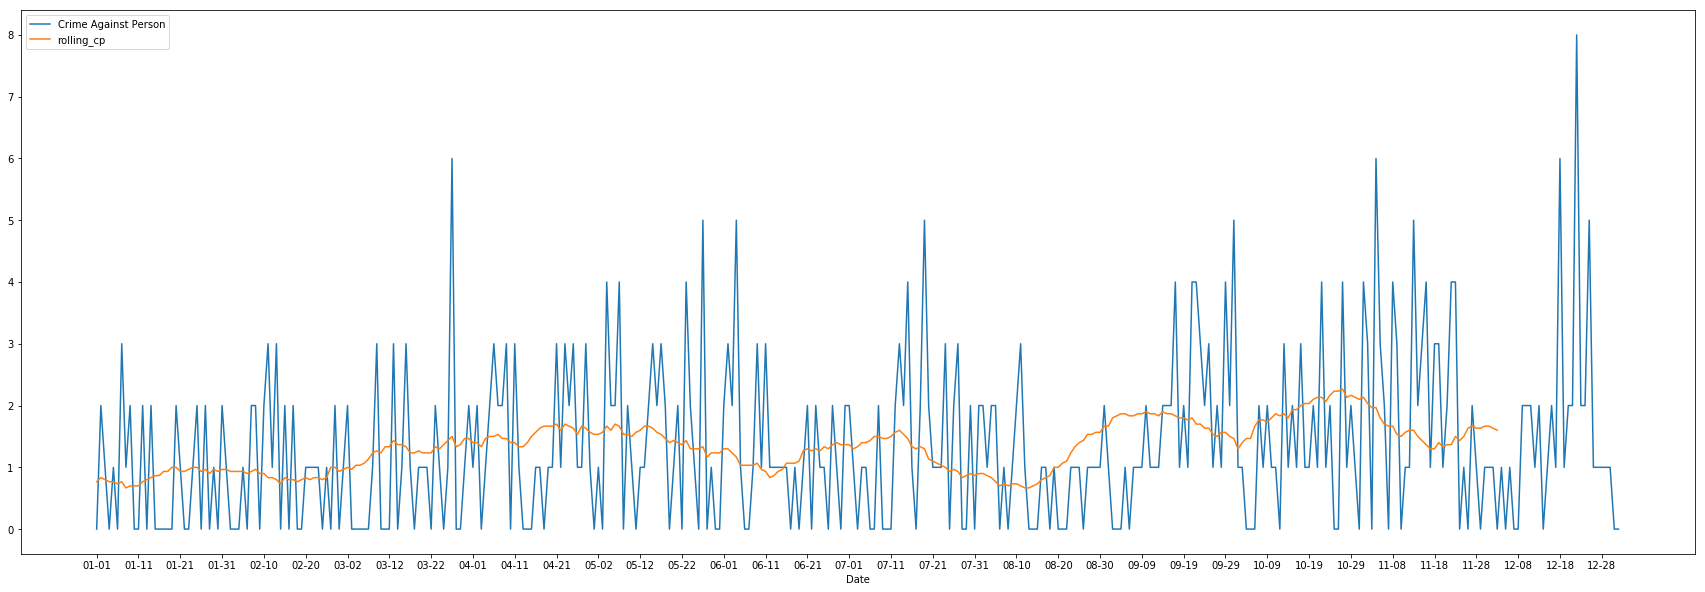

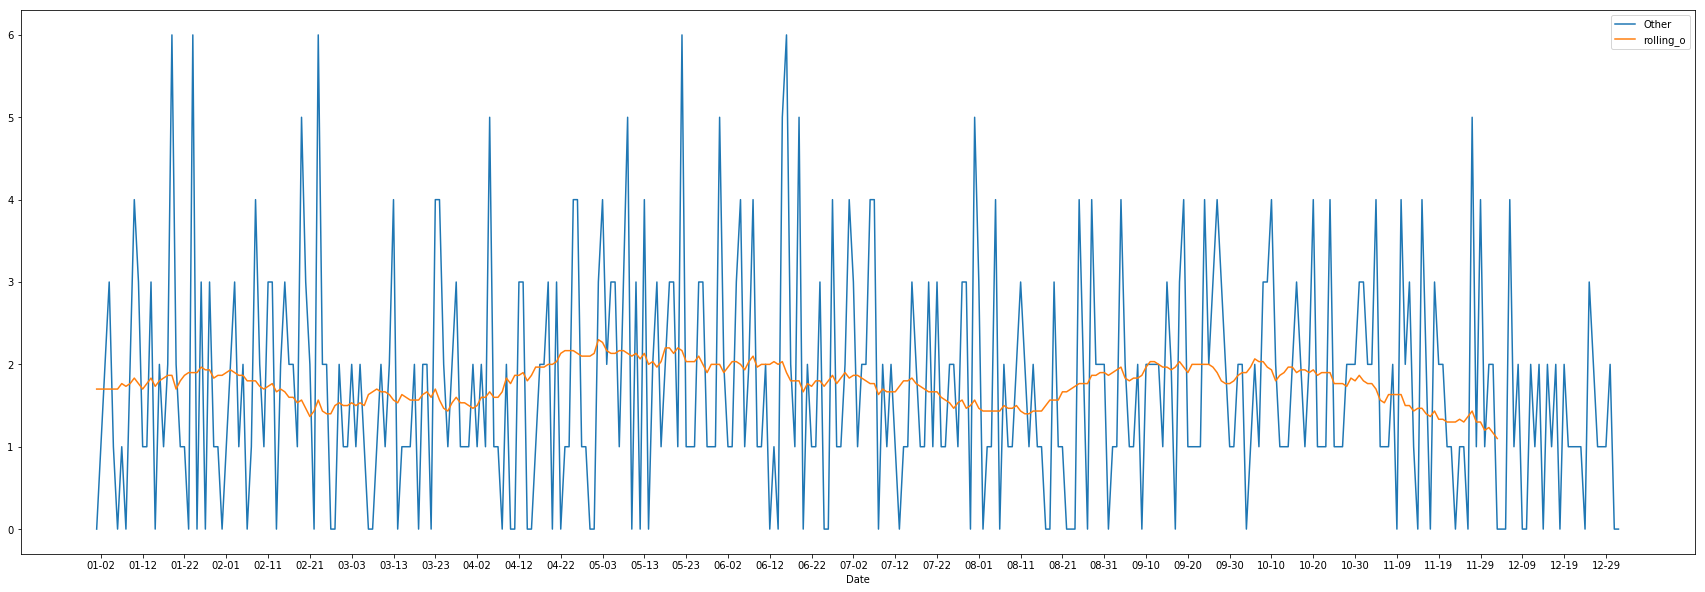

In [17]:
date3 = dayandcount(zip20874,2)

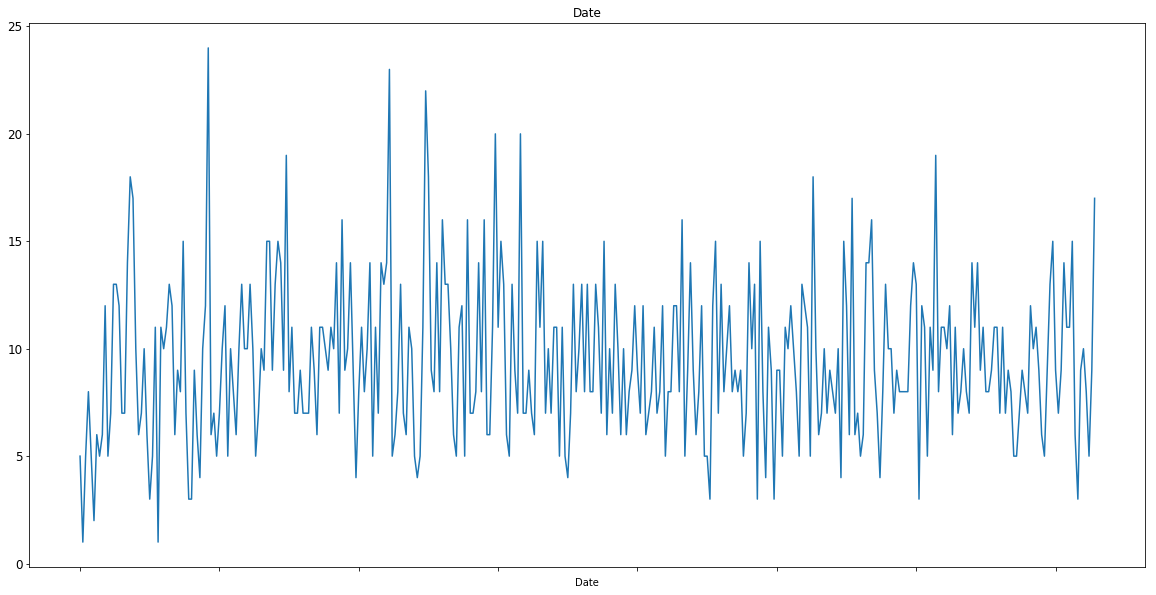

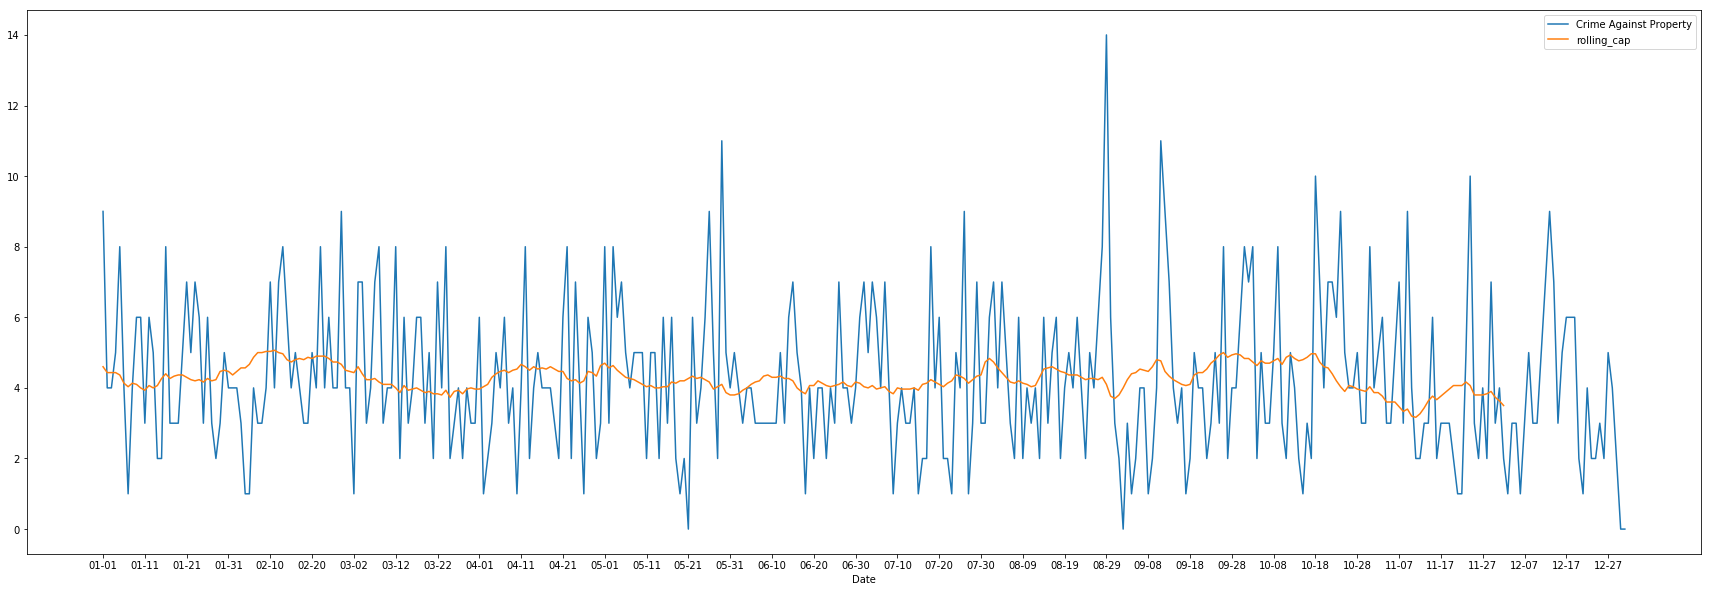

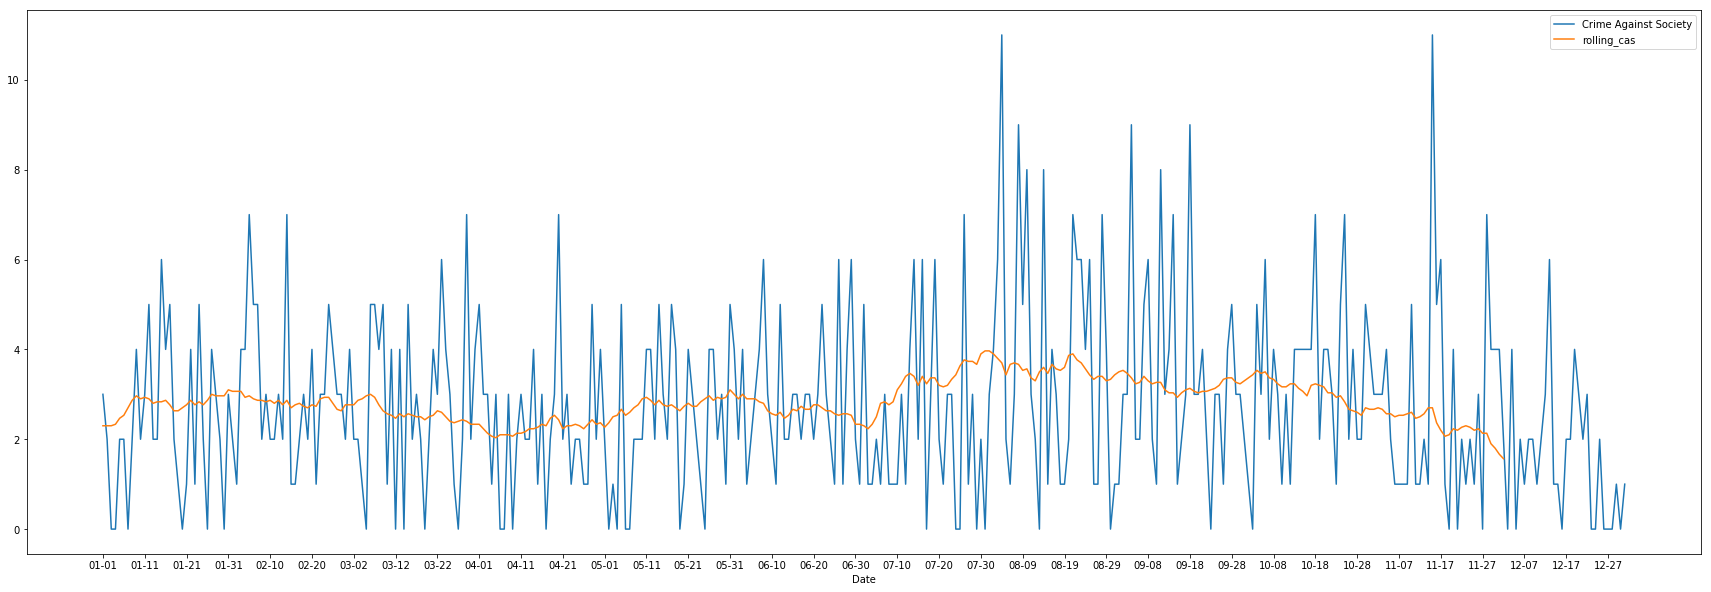

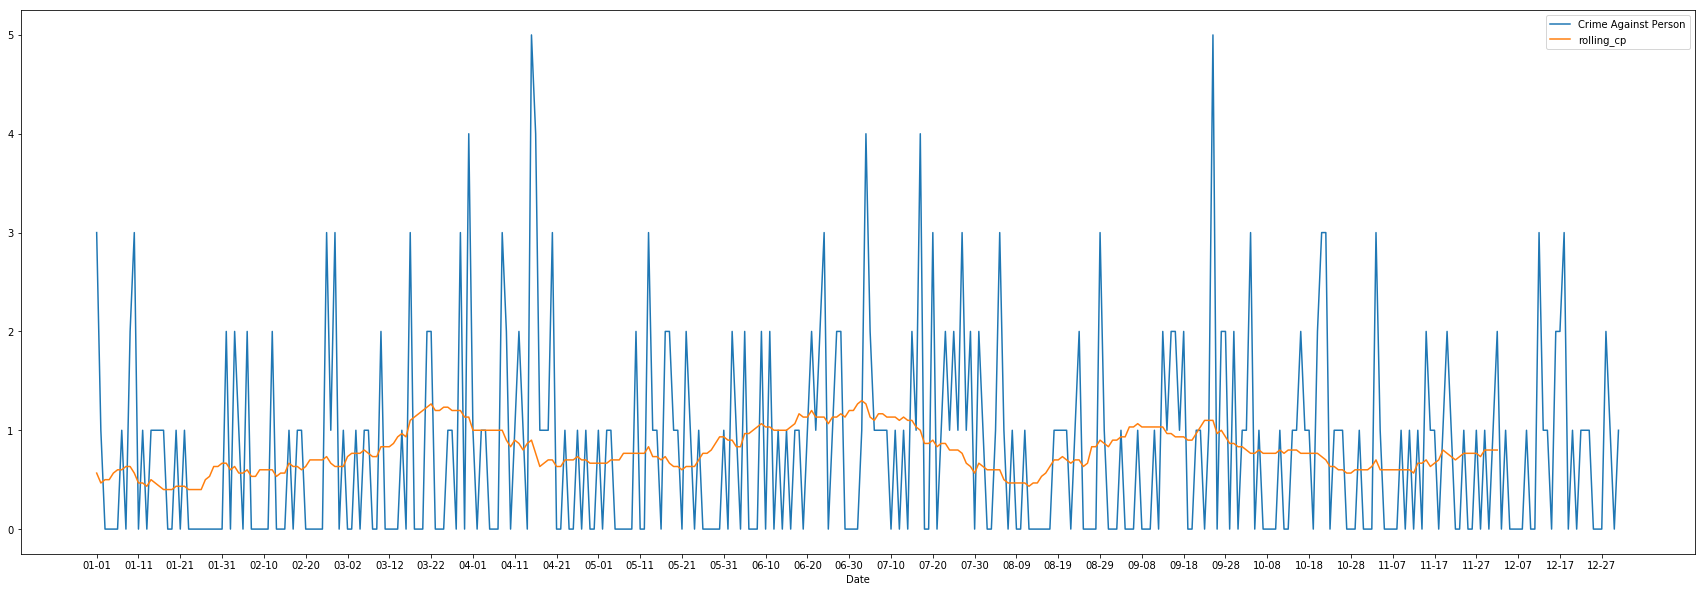

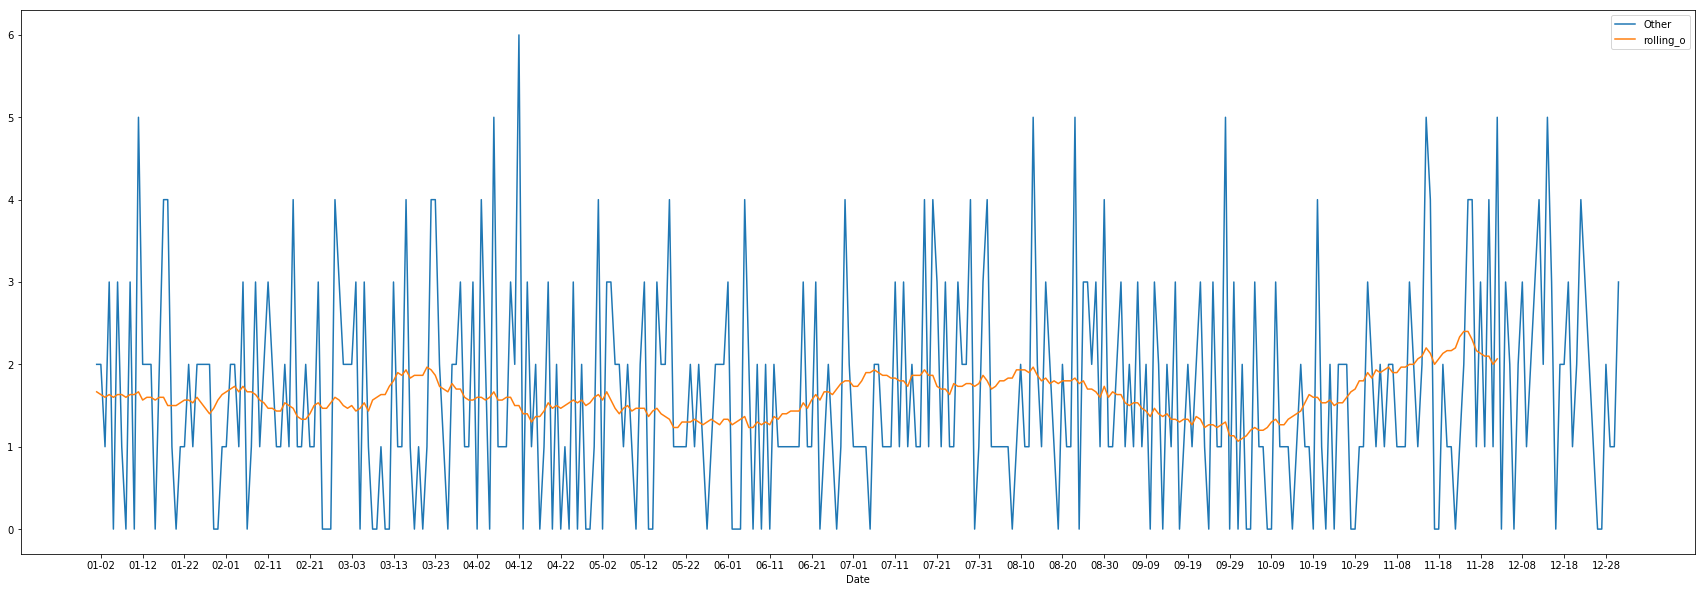

In [18]:
date4 = dayandcount(zip20904,2)

In [19]:
def yeartomonth(date):
    jan = date.loc[date['month'] == "01"]
    feb = date.loc[date['month'] == "02"]
    mar = date.loc[date['month'] == "03"]
    apr = date.loc[date['month'] == "04"]
    may = date.loc[date['month'] == "05"]
    jun = date.loc[date['month'] == "06"]
    jul = date.loc[date['month'] == "07"]
    aug = date.loc[date['month'] == "08"]
    sep = date.loc[date['month'] == "09"]
    octo = date.loc[date['month'] == "10"]
    nov = date.loc[date['month'] == "11"]
    dec = date.loc[date['month'] == "12"]
    return jan,feb,mar,apr,may,jun,jul,aug,sep,octo,nov,dec

In [20]:
def monthh(mon,title):
    daycount = [0]*31
    cap = [0]*31
    cas = [0]*31
    capp = [0]*31
    oth = [0]*31
    mon = mon.sort_values(['Date']).reset_index()
    i = 0
    for index, row in mon.iterrows():
        daycount[i] = row['count']
        cap[i] = row['Crime Against Property']
        cas[i] = row['Crime Against Society']
        capp[i] = row['Crime Against Person']
        oth[i] = row['Other']
        i = i + 1
    mon = mon.iloc[::-1]
    ax = mon.plot(x = 'Date', y = 'count', kind = 'barh', figsize = (10,10),title = title, legend = False, fontsize = 12)
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+1, i.get_y()+.19,str(i.get_width()))
    ax = mon.plot.barh(x = 'Date', y = ["Crime Against Property", "Crime Against Society", "Crime Against Person", "Other"],figsize = (10,10),stacked = True,title = "Months")

In [22]:
income = pd.read_excel('/Users/VarshiniSelvadurai/Documents/Internship/Crime_Edited.xlsx', sheet_name = '2017 - INCOME')
#income = pd.read_excel('C:\\Users\\vns8\\Documents\\Crime_Edited.xlsx', sheet_name = '2017 - INCOME')

In [23]:
def monthandcount(jan,feb,mar,apr,may,jun,jul,aug,sep,octo,nov,dec,s,income):
    #monthh(jan,"January")
    #monthh(feb,"February")
    #monthh(mar,"March")
    #monthh(apr,"April")
    #monthh(may,"May")
    #monthh(jun,"June")
    #monthh(jul,"July")
    #monthh(aug,"August")
    #monthh(sep,"September")
    #monthh(octo,"October")
    #monthh(nov,"November")
    #monthh(dec,"December")
    ugh =[]
    ugh.append(jan['count'].sum())
    ugh.append(feb['count'].sum())
    ugh.append(mar['count'].sum())
    ugh.append(apr['count'].sum())
    ugh.append(may['count'].sum())
    ugh.append(jun['count'].sum())
    ugh.append(jul['count'].sum())
    ugh.append(aug['count'].sum())
    ugh.append(sep['count'].sum())
    ugh.append(octo['count'].sum())
    ugh.append(nov['count'].sum())
    ugh.append(dec['count'].sum())

    ughh =[]
    ughh.append(jan['Crime Against Property'].sum())
    ughh.append(feb['Crime Against Property'].sum())
    ughh.append(mar['Crime Against Property'].sum())
    ughh.append(apr['Crime Against Property'].sum())
    ughh.append(may['Crime Against Property'].sum())
    ughh.append(jun['Crime Against Property'].sum())
    ughh.append(jul['Crime Against Property'].sum())
    ughh.append(aug['Crime Against Property'].sum())
    ughh.append(sep['Crime Against Property'].sum())
    ughh.append(octo['Crime Against Property'].sum())
    ughh.append(nov['Crime Against Property'].sum())
    ughh.append(dec['Crime Against Property'].sum())

    ughhh =[]
    ughhh.append(jan['Crime Against Society'].sum())
    ughhh.append(feb['Crime Against Society'].sum())
    ughhh.append(mar['Crime Against Society'].sum())
    ughhh.append(apr['Crime Against Society'].sum())
    ughhh.append(may['Crime Against Society'].sum())
    ughhh.append(jun['Crime Against Society'].sum())
    ughhh.append(jul['Crime Against Society'].sum())
    ughhh.append(aug['Crime Against Society'].sum())
    ughhh.append(sep['Crime Against Society'].sum())
    ughhh.append(octo['Crime Against Society'].sum())
    ughhh.append(nov['Crime Against Society'].sum())
    ughhh.append(dec['Crime Against Society'].sum())

    ughhhh =[]
    ughhhh.append(jan['Crime Against Person'].sum())
    ughhhh.append(feb['Crime Against Person'].sum())
    ughhhh.append(mar['Crime Against Person'].sum())
    ughhhh.append(apr['Crime Against Person'].sum())
    ughhhh.append(may['Crime Against Person'].sum())
    ughhhh.append(jun['Crime Against Person'].sum())
    ughhhh.append(jul['Crime Against Person'].sum())
    ughhhh.append(aug['Crime Against Person'].sum())
    ughhhh.append(sep['Crime Against Person'].sum())
    ughhhh.append(octo['Crime Against Person'].sum())
    ughhhh.append(nov['Crime Against Person'].sum())
    ughhhh.append(dec['Crime Against Person'].sum())

    ughhhhh =[]
    ughhhhh.append(jan['Other'].sum())
    ughhhhh.append(feb['Other'].sum())
    ughhhhh.append(mar['Other'].sum())
    ughhhhh.append(apr['Other'].sum())
    ughhhhh.append(may['Other'].sum())
    ughhhhh.append(jun['Other'].sum())
    ughhhhh.append(jul['Other'].sum())
    ughhhhh.append(aug['Other'].sum())
    ughhhhh.append(sep['Other'].sum())
    ughhhhh.append(octo['Other'].sum())
    ughhhhh.append(nov['Other'].sum())
    ughhhhh.append(dec['Other'].sum())
    
    ughhhhhh =[]
    ughhhhhh.append(jan['count'].mean())
    ughhhhhh.append(feb['count'].mean())
    ughhhhhh.append(mar['count'].mean())
    ughhhhhh.append(apr['count'].mean())
    ughhhhhh.append(may['count'].mean())
    ughhhhhh.append(jun['count'].mean())
    ughhhhhh.append(jul['count'].mean())
    ughhhhhh.append(aug['count'].mean())
    ughhhhhh.append(sep['count'].mean())
    ughhhhhh.append(octo['count'].mean())
    ughhhhhh.append(nov['count'].mean())
    ughhhhhh.append(dec['count'].mean())
    
    month = pd.DataFrame({"months": ["Jan",'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], 'counts':ugh, "Crime Against Property":ughh, "Crime Against Society":ughhh,'Crime Against Person':ughhhh,'Other':ughhhh, "income": [x/10000 for x in income[int(s)]],"avg":ughhhhh})
    month['num']=[1,2,3,4,5,6,7,8,9,10,11,12]
    
    from scipy import stats
    # get coeffs of linear fit
    m, b, r_value, p_value, std_err = stats.linregress(month['num'],month['counts'])
    m1, b1, r_value1, p_value1, std_err1 = stats.linregress(month['num'],month['income'])
    m2, b2, r_value2, p_value2, std_err2 = stats.linregress(month['num'],month['avg'])
    print(m,b)
    print(m1,b1)
    print(m2,b2)
    ugh = []
    ughh = []
    ughhh = []
    for index,row in month.iterrows():
        ugh.append(m * int(row['num']) + b)
        ughh.append(m1 * int(row['num']) + b1)
        ughhh.append(m2 * int(row['num']) + b2)
    month['reg_counts'] = ugh
    month['reg_income'] = ughh
    month['reg_avg'] = ughhh
    ax = month.plot(x = "months", y = ['income','reg_income','avg','reg_avg'],kind = 'line',figsize=(10,10),xticks = [0,1,2,3,4,5,6,7,8,9,10,11,12],grid = True,title = 'Income(in ten thousands), Avg Crime Count by month')
    #sns.set(rc={'figure.figsize':(10,10)})
    #f = sns.lmplot(x='num', y="counts", data=month)
    #f.set(ylim = (0,550))
    
    ## Without a constant
    #ax = month.iloc[::-1].plot(x = 'months', y = 'counts', kind = 'barh', figsize = (10,10),title = 'Months', legend = False, fontsize = 12)
    #for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
    #    ax.text(i.get_width()+1, i.get_y()+.19,str(i.get_width()))
    #ax = month.iloc[::-1].plot.barh(x = 'months', y = ["Crime Against Property", "Crime Against Society", "Crime Against Person", "Other"],figsize = (20,20),stacked = True,title = "Months",xticks = [1,2,3,4,5,6,7,8,9,10,11,12],grid = True)

# income is Housing Price by month in 2017, reg_income is the regression line of the data, avg is average crime per month in 2017, reg_avg is regression line

4.020979020979021 348.03030303030306
0.14118881118881116 52.6939393939394
-0.6643356643356643 48.31818181818182


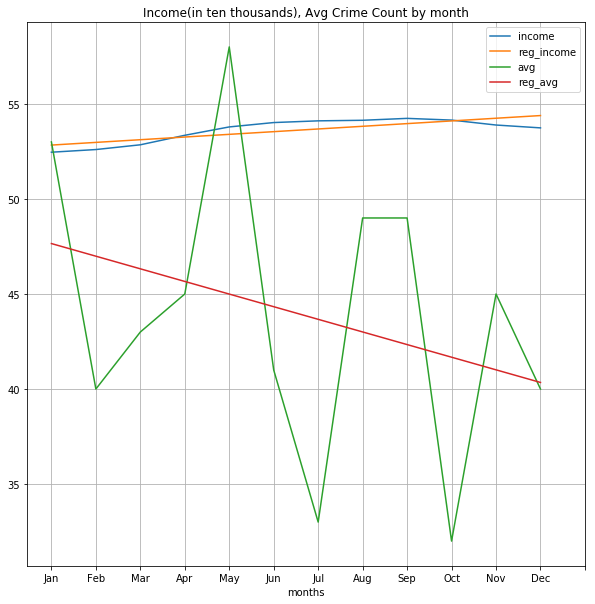

In [24]:
jan,feb,mar,apr,may,jun,jul,aug,sep,octo,nov,dec = yeartomonth(date1)
monthandcount(jan,feb,mar,apr,may,jun,jul,aug,sep,octo,nov,dec,'20910',income)

-4.108391608391608 375.28787878787875
0.03405594405594421 37.818636363636365
0.01048951048951049 48.18181818181818


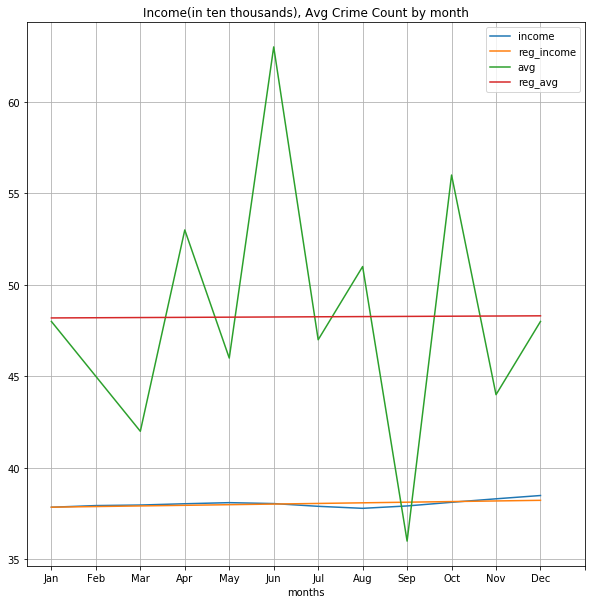

In [25]:
jan,feb,mar,apr,may,jun,jul,aug,sep,octo,nov,dec = yeartomonth(date2)
monthandcount(jan,feb,mar,apr,may,jun,jul,aug,sep,octo,nov,dec,'20902',income)

3.744755244755245 262.5757575757576
0.11377622377622384 27.677121212121218
-0.32167832167832167 54.75757575757576


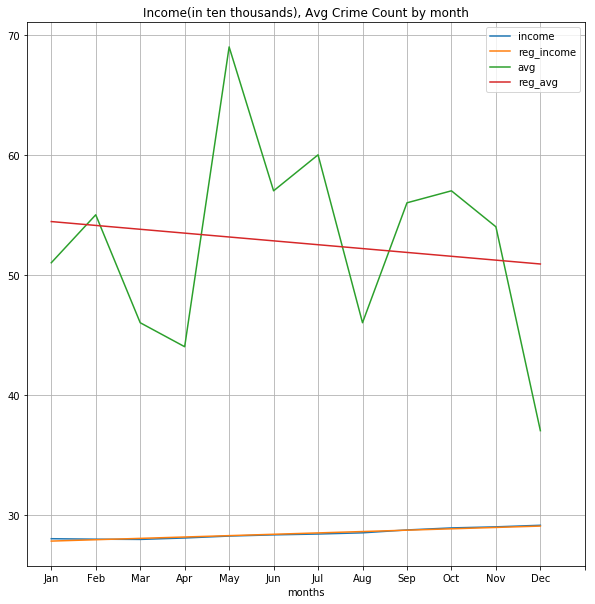

In [26]:
jan,feb,mar,apr,may,jun,jul,aug,sep,octo,nov,dec = yeartomonth(date3)
monthandcount(jan,feb,mar,apr,may,jun,jul,aug,sep,octo,nov,dec,'20874',income)

0.16783216783216784 285.5757575757576
0.13444055944055952 38.79696969696969
0.6503496503496504 45.27272727272727


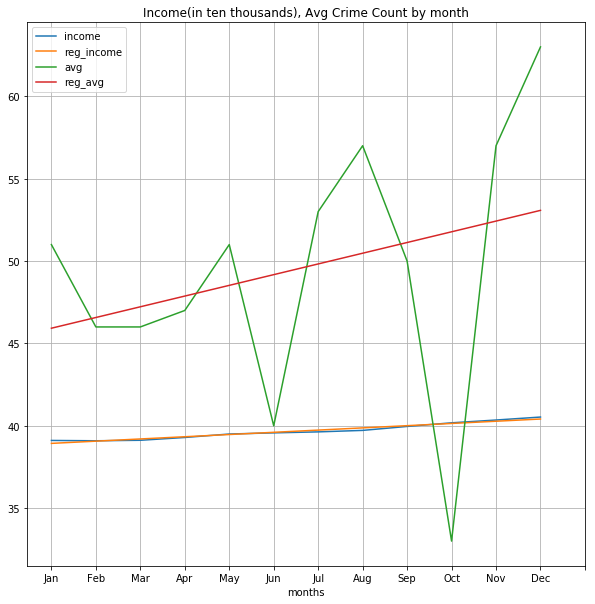

In [27]:
jan,feb,mar,apr,may,jun,jul,aug,sep,octo,nov,dec = yeartomonth(date4)
monthandcount(jan,feb,mar,apr,may,jun,jul,aug,sep,octo,nov,dec,'20904',income)

2.4510489510489513 273.3181818181818
0.05615384615384595 31.731666666666673
0.986013986013986 45.59090909090909


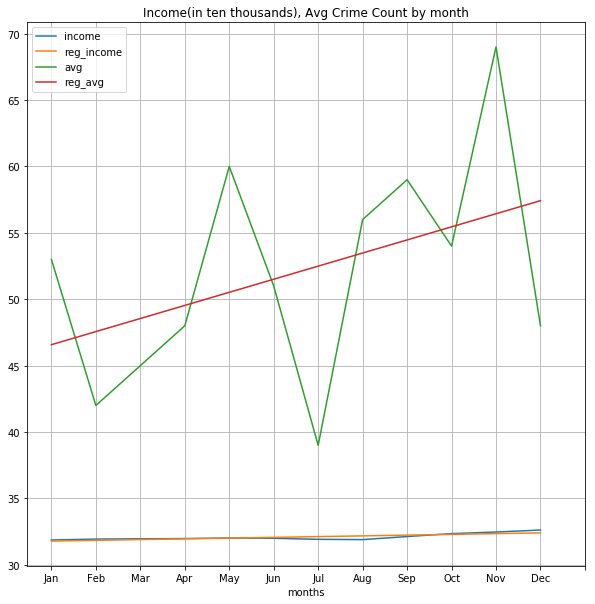

In [28]:
jan,feb,mar,apr,may,jun,jul,aug,sep,octo,nov,dec = yeartomonth(date5)
monthandcount(jan,feb,mar,apr,may,jun,jul,aug,sep,octo,nov,dec,'20906',income)

In [30]:
temp = pd.read_excel('/Users/VarshiniSelvadurai/Documents/Internship/Crime_Edited.xlsx', sheet_name = '2017 - TEMP')
#temp = pd.read_excel('C:\\Users\\vns8\\Documents\\Crime_Edited.xlsx', sheet_name = '2017 - TEMP')
date1["Temp"] = temp["AVG"]
date2["Temp"] = temp["AVG"]
date3["Temp"] = temp["AVG"]
date4["Temp"] = temp["AVG"]
date5["Temp"] = temp["AVG"]

In [31]:
def heatmapyear(data,x,size,s):
    data = data.iloc[::-1]
    date = [[0 for j in range(x)] for i in range(7)]
    i = 0
    j = 0
    for index,row in data.iterrows():
        try:
            if row["Weekday"] == "Sunday": i = 0
            elif row["Weekday"] == "Monday": i = 1
            elif row["Weekday"] == "Tuesday": i = 2
            elif row["Weekday"] == "Wednesday": i = 3
            elif row["Weekday"] == "Thursday": i = 4
            elif row["Weekday"] == "Friday": i = 5
            elif row["Weekday"] == "Saturday": i = 6
            date[i][j] = int(row[s])
            if i == 6:
                j += 1
        except:
            print()
    ugh = []
    for i in range (0,x):
        ugh.append("Week " + str(i+1))
    heat = pd.DataFrame({"Sunday":date[0],"Monday":date[1],"Tuesday":date[2],"Wednesday":date[3],"Thursday":date[4],"Friday":date[5],"Saturday":date[6],}, index = ugh)
    f, ax = plt.subplots(figsize=(size))
    if s == "count":
        ax = sns.heatmap(heat, square = True, cmap="YlGnBu",ax=ax,annot = True)
    if s == "Temp":
        ax = sns.heatmap(heat, square = True, center = 57,ax=ax,annot = True)

In [33]:
def heatmapmonth(data,s):
    date = [[0 for j in range(12)] for i in range(31)]
    for index,row in data.iterrows():
        try:
            d = int(row["day"]) - 1
            m = int(row["month"]) - 1
            c = int(row[s])
            date[d][m] = c
        except:
            print()
    heat = pd.DataFrame({"1":date[0], "2":date[1], "3":date[2], "4":date[3], "5":date[4], "6":date[5], "7":date[6], "8":date[7], "9":date[8], "10":date[9], "11":date[11], "12":date[11], "13":date[12], "14":date[13], "15":date[14], "16":date[15], "17":date[16], "18":date[17], "19":date[18], "20":date[19], "21":date[20], "22":date[21], "23":date[22], "24":date[23], "25":date[24], "26":date[25], "27":date[26], "28":date[27], "29":date[28], "30":date[29], "31":date[30]}, index =["January","February","March","April","May","June","July","August","September","October","November","December"])
    grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
    f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws,figsize=(10,10))
    if s == "count":
        ax = sns.heatmap(heat, square = True, cmap="YlGnBu",ax=ax,cbar_ax=cbar_ax,cbar_kws={"orientation": "horizontal"},annot = True)
        fig = ax.get_figure()
        fig.savefig("2017.png")
    if s == "Temp":
        ax = sns.heatmap(heat, square = True, center = 57,ax=ax,cbar_ax=cbar_ax,cbar_kws={"orientation": "horizontal"},annot = True)
    heatmapyear(data,53,(15,15),s)
    jan,feb,mar,apr,may,jun,jul,aug,sep,octo,nov,dec = yeartomonth(data)
    heatmapyear(jan,5,(5,5),s)
    heatmapyear(feb,5,(5,5),s)
    heatmapyear(mar,5,(5,5),s)
    heatmapyear(apr,6,(5,5),s)
    heatmapyear(may,5,(5,5),s)
    heatmapyear(jun,5,(5,5),s)
    heatmapyear(jul,6,(5,5),s)
    heatmapyear(aug,5,(5,5),s)
    heatmapyear(sep,5,(5,5),s)
    heatmapyear(octo,5,(5,5),s)
    heatmapyear(nov,5,(5,5),s)
    heatmapyear(dec,6,(5,5),s)
    

# Crime by Zipcode, Heat map based on Day of month

KeyError: 'month'

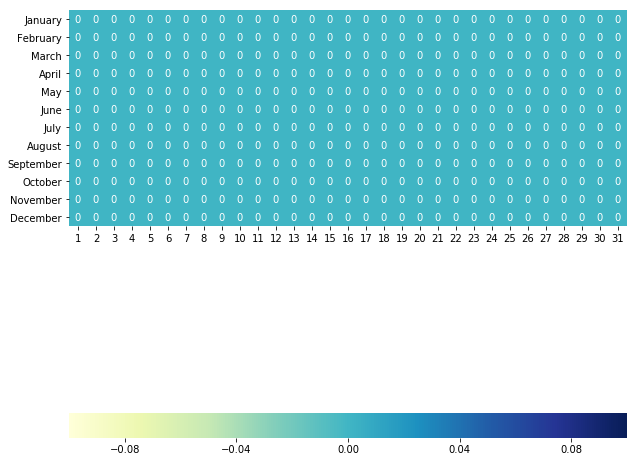

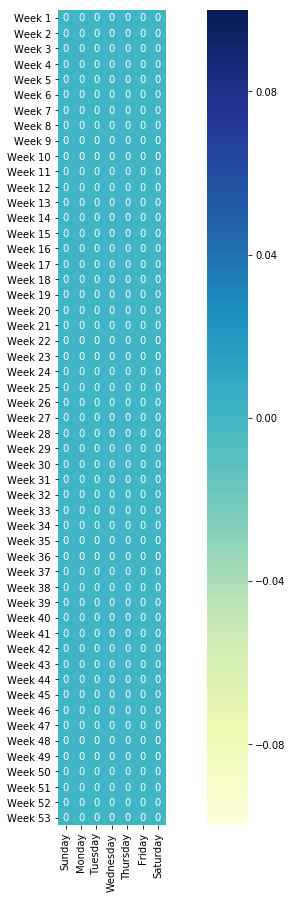

In [34]:
heatmapmonth(data,"count")

In [ ]:
heatmapmonth(date1,"count")

In [ ]:
heatmapmonth(date2,"count")

In [ ]:
heatmapmonth(date3,"count")

In [ ]:
heatmapmonth(date4,"count")

In [ ]:
heatmapmonth(date5,"count")

# Heatmap based on temp during Day of year

In [ ]:
heatmapmonth(date1,"Temp")

In [ ]:
print(len(octo.index))

In [ ]:
def tempandcrime(date1):
    date1 = date1.loc[::-1]
    date1["Day Number"] = [i+1 for i in range (0,365)]
    date1["avg_count"] = date1['count'].rolling(30).mean()
    date1["avg_temp"] = date1['Temp'].rolling(30).mean()
   # ax = date1.plot(x = 'Day Number', y = ['count','avg_count' ], kind = 'line', figsize = (25,5),title = "Date", legend = False, fontsize = 12,xticks = [i for i in range(0,365,7)],grid = True)
    #ax = date1.plot(x = 'Day Number', y = ['Temp','avg_temp'], kind = 'line', figsize = (25,5),title = "Date", legend = False, fontsize = 12,xticks = [i for i in range(0,365,7)],grid = True)

    #ax = date1.plot(x = 'Day Number', y = ['avg_count' ], kind = 'line', figsize = (25,5),title = "Date", legend = False, fontsize = 12,xticks = [i for i in range(0,365,7)],grid = True)
    #ax = date1.plot(x = 'Day Number', y = ['avg_temp'], kind = 'line', figsize = (25,5),title = "Date", legend = False, fontsize = 12,xticks = [i for i in range(0,365,7)],grid = True)

    #ax = date1.plot(x = 'Day Number', y = ['count','avg_count' ], kind = 'line', figsize = (25,5),title = "Date", legend = False, fontsize = 12,xticks = [79,172,256,355],grid = True)
    #ax = date1.plot(x = 'Day Number', y = ['Temp','avg_temp'], kind = 'line', figsize = (25,5),title = "Date", legend = False, fontsize = 12,xticks = [79,172,256,355],grid = True)

    ax = date1.plot(x = 'Day Number', y = ['avg_count' ], kind = 'line', figsize = (25,5),title = "Date", legend = False, fontsize = 12,xticks = [79,172,256,355],grid = True)
    #ax = date1.plot(x = 'Day Number', y = ['avg_temp'], kind = 'line', figsize = (25,5),title = "Date", legend = False, fontsize = 12,xticks = [79,172,256,355],grid = True)
    return date1


# AVG crime by day of year --> for each zipcode

In [ ]:
date1 = tempandcrime(date1)

In [ ]:
date2 = tempandcrime(date2)

In [ ]:
date3 = tempandcrime(date3)

In [ ]:
date4 = tempandcrime(date4)

In [ ]:
date5 = tempandcrime(date5)

In [ ]:
date = pd.DataFrame({"Day Number":date1["Day Number"], "Temp":date1["Temp"], "20910":date1["count"],"20902":date2["count"],"20874":date3["count"],"20904":date4["count"],"20906":date5["count"]})

In [ ]:
ugh = []
ughh = []
ughhh = []
for index,row in date.iterrows():
    ugh.append(int(row["20910"]))
    ugh.append(int(row["20902"]))
    ugh.append(int(row["20874"]))
    ugh.append(int(row["20906"]))
    ugh.append(int(row["20904"]))
    ughh.append(np.mean(ugh))
    ughhh.append(np.std(ugh))
    ugh = []
date["AVG"] = ughh
date["STD"] = ughhh
ax = date.plot(x = 'Day Number', kind = 'line', figsize = (25,5), y = "AVG")

In [ ]:
print(zip20910.head())

In [ ]:
def countt(data):
    ugh = [0 for i in range(0,365)]
    for index,row in data.iterrows():
        ugh[datevalues.index(row["Start Date"])] += 1
    return ugh

In [ ]:
def hourly_avg(data):
    h0 = data.loc[data["Start Time"] == '00']
    h1 = data.loc[data["Start Time"] == '01']
    h2 = data.loc[data["Start Time"] == '02']
    h3 = data.loc[data["Start Time"] == '03']
    h4 = data.loc[data["Start Time"] == '04']
    h5 = data.loc[data["Start Time"] == '05']
    h6 = data.loc[data["Start Time"] == '06']
    h7 = data.loc[data["Start Time"] == '07']
    h8 = data.loc[data["Start Time"] == '08']
    h9 = data.loc[data["Start Time"] == '09']
    h10 = data.loc[data["Start Time"] == '10']
    h11 = data.loc[data["Start Time"] == '11']
    h12 = data.loc[data["Start Time"] == '12']
    h13 = data.loc[data["Start Time"] == '13']
    h14 = data.loc[data["Start Time"] == '14']
    h15 = data.loc[data["Start Time"] == '15']
    h16 = data.loc[data["Start Time"] == '16']
    h17 = data.loc[data["Start Time"] == '17']
    h18 = data.loc[data["Start Time"] == '18']
    h19 = data.loc[data["Start Time"] == '19']
    h20 = data.loc[data["Start Time"] == '20']
    h21 = data.loc[data["Start Time"] == '21']
    h22 = data.loc[data["Start Time"] == '22']
    h23 = data.loc[data["Start Time"] == '23']

    hour = pd.DataFrame({'Hour':[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]})
    #hour = pd.DataFrame({'00':h0,'01':h1,'02':h2,'04':h4,'06':h6,'08':h8,'10':h10,'12':h12,'14':h14,'16':h16,'18':h18,'20':h20,'03':h3,'05':h5,'07':h7,'09':h9,'11':h11,'13':h13,'15':h15,'17':h17,'19':h19,'21':h21,'22':h22,'23':h23})
    #hourbar = hour.sort_values(['Hour'])
    #hourbar = hour.drop([24],axis = 0)
    #ax = hour.plot(x = 'Hour', kind = 'line', figsize = (20,20),title = '2017 - Hourly Overlap', fontsize = 12, xticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
    ugh = []
    ughh = []
    ughhh = []
    ugh.append(np.mean(countt(h0)))
    ugh.append(np.mean(countt(h1)))
    ugh.append(np.mean(countt(h2)))
    ugh.append(np.mean(countt(h3)))
    ugh.append(np.mean(countt(h4)))
    ugh.append(np.mean(countt(h5)))
    ugh.append(np.mean(countt(h6)))
    ugh.append(np.mean(countt(h7)))
    ugh.append(np.mean(countt(h8)))
    ugh.append(np.mean(countt(h9)))
    ugh.append(np.mean(countt(h10)))
    ugh.append(np.mean(countt(h11)))
    ugh.append(np.mean(countt(h12)))
    ugh.append(np.mean(countt(h13)))
    ugh.append(np.mean(countt(h14)))
    ugh.append(np.mean(countt(h15)))
    ugh.append(np.mean(countt(h16)))
    ugh.append(np.mean(countt(h17)))
    ugh.append(np.mean(countt(h18)))
    ugh.append(np.mean(countt(h19)))
    ugh.append(np.mean(countt(h20)))
    ugh.append(np.mean(countt(h21)))
    ugh.append(np.mean(countt(h22)))
    ugh.append(np.mean(countt(h23)))
    hour["AVG"] = ugh
    ugh = []
    ugh.append(np.std(countt(h0)))
    ugh.append(np.std(countt(h1)))
    ugh.append(np.std(countt(h2)))
    ugh.append(np.std(countt(h3)))
    ugh.append(np.std(countt(h4)))
    ugh.append(np.std(countt(h5)))
    ugh.append(np.std(countt(h6)))
    ugh.append(np.std(countt(h7)))
    ugh.append(np.std(countt(h8)))
    ugh.append(np.std(countt(h9)))
    ugh.append(np.std(countt(h10)))
    ugh.append(np.std(countt(h11)))
    ugh.append(np.std(countt(h12)))
    ugh.append(np.std(countt(h13)))
    ugh.append(np.std(countt(h14)))
    ugh.append(np.std(countt(h15)))
    ugh.append(np.std(countt(h16)))
    ugh.append(np.std(countt(h17)))
    ugh.append(np.std(countt(h18)))
    ugh.append(np.std(countt(h19)))
    ugh.append(np.std(countt(h20)))
    ugh.append(np.std(countt(h21)))
    ugh.append(np.std(countt(h22)))
    ugh.append(np.std(countt(h23)))
    hour["STD"] = ugh
    ax = hour.plot(x = 'Hour', kind = 'line', figsize = (10,10), y = "AVG", yerr = "STD",xticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

# By hour for zipcode

In [ ]:
hourly_avg(zip20910)

In [ ]:
hourly_avg(zip20902)

In [ ]:
hourly_avg(zip20874)

In [ ]:
hourly_avg(zip20904)

In [ ]:
hourly_avg(zip20906)

In [ ]:
print(zip20906.groupby("Start Time"))

In [ ]:
x = pd.DataFrame({"Zipcode":[20910,20902,20906,20874,20904],"Total Crime":[4490,4183,3471,3443,3440],"Average House Price":[536116.66666667,380400,320966.66666667,284166.66666667,396708.33333333]})

ax = x.plot(x = "Total Crime", y = "Average House Price", kind = "scatter")